# Importing Packages

In [1]:
# This imports all of the necessary packages needed for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

from xgboost import XGBClassifier
import xgboost as xgb
import pickle

# Data Checking

## Assumptions

<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of children or dependents</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income(missing last 0)</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income(missing last 0)</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount (In thousands)</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in months)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: No credit history, 1: Has credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>

## Loading and checking data

In [2]:
# Reading in data
df = pd.read_csv('data/loan_data_set.csv')
# Checking the first five rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Checking the shape of the data
df.shape

(614, 13)

In [4]:
#Creating a copy of the dataframe in another variable to preserve the original dataframe
loan_df = df.copy()

In [5]:
#Checking variable output
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Multiplying columns to provide proper income numbers to the dataset
loan_df['ApplicantIncome'], loan_df['CoapplicantIncome'], loan_df['LoanAmount']  = [loan_df['ApplicantIncome'].apply(lambda x: x*10), 
loan_df['CoapplicantIncome'].apply(lambda x: x*10), loan_df['LoanAmount'].apply(lambda x: x*1000)]

In [7]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,58490,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,45830,15080.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,30000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,25830,23580.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,60000,0.0,141000.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA)

## Checking value counts for each column

In [8]:
# This for loop gets the value counts for each column
for column in loan_df:
    columns_info = loan_df[column]
    print(columns_info.value_counts(dropna=False))
    print('-------------------------------------')
    print('\n\n')
    

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
-------------------------------------



Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
-------------------------------------



Yes    398
No     213
NaN      3
Name: Married, dtype: int64
-------------------------------------



0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
-------------------------------------



Graduate        480
Not Graduate    134
Name: Education, dtype: int64
-------------------------------------



No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
-------------------------------------



25000    9
45830    6
60000    6
26000    6
33330    5
        ..
32440    1
44080    1
39170    1
39920    1
75830    1
Name: ApplicantIncome, Length: 505, dtype: int64
------------------------------------

In [9]:
# Checking the dataframe for missing values
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Categorical Variables

### Gender Percentages/Counts

In [10]:
#Checking the percentage of applicants based on gender
male_count = len(loan_df[loan_df['Gender'] == 'Male'])
female_count = len(loan_df[loan_df['Gender'] == 'Female'])
missing_gender = len(loan_df[loan_df['Gender'].isnull()])

print('Percentage of Male applicants: ', (male_count/len(loan_df['Gender'])*100))
print('percentage of Female applicants: ', (female_count/len(loan_df['Gender'])* 100))
print('Percentage of Missing: ', (missing_gender/len(loan_df['Gender'])*100))

Percentage of Male applicants:  79.64169381107492
percentage of Female applicants:  18.241042345276874
Percentage of Missing:  2.1172638436482085


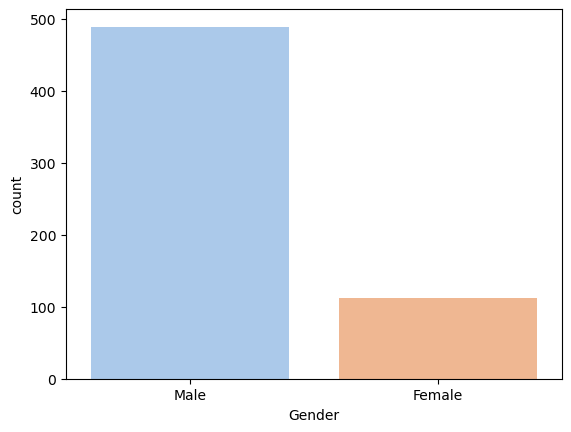

In [11]:
#Creating a visualization 
sns.countplot(x="Gender", data=loan_df, palette = 'pastel');

### Function

In [12]:
def col_percentages(df_name, col, value1, value2, value3=None):
    """
    This function provides the value counts, percentages and visualizations for columns which 3 values or less.
    """
    print(df_name[col].value_counts())
    print('--------------------------')
    print('\n')
    
    value_1 = len(df_name[df_name[col] == value1])
    value_2 = len(df_name[df_name[col] == value2])
    value_3 = len(df_name[df_name[col] == value3])
    missing_value = len(df_name[df_name[col].isnull()])
    print('Percentage of {} {}: '.format(col, df_name[col].value_counts().index.tolist()[0]), (value_1/len(df_name[col])*100))
    print('percentage of {} {}:'.format(col, df_name[col].value_counts().index.tolist()[1]), (value_2/len(df_name[col])* 100))
    if value3 != None:
        print('percentage of {} {}:'.format(col, df_name[col].value_counts().index.tolist()[2]), (value_3/len(df_name[col])* 100))
    print('Percentage of Missing: ', (missing_value/len(df_name[col])*100))
    
    print('--------------------------')
    print('\n')
    
    sns.countplot(x = col, data=df_name, palette = 'pastel')

### Married Percentages/Counts

Yes    398
No     213
Name: Married, dtype: int64
--------------------------


Percentage of Married Yes:  64.82084690553745
percentage of Married No: 34.69055374592834
Percentage of Missing:  0.4885993485342019
--------------------------




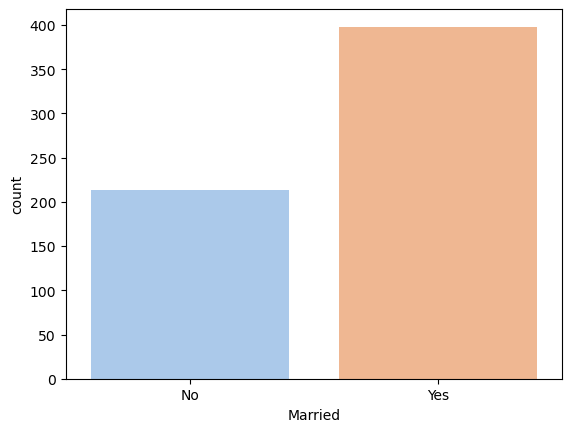

In [13]:
# Using function to get value counts, percentages and visualization
col_percentages(loan_df,'Married', 'Yes', 'No')

### Self Employed Percentages/Counts

No     500
Yes     82
Name: Self_Employed, dtype: int64
--------------------------


Percentage of Self_Employed No:  81.43322475570032
percentage of Self_Employed Yes: 13.355048859934854
Percentage of Missing:  5.211726384364821
--------------------------




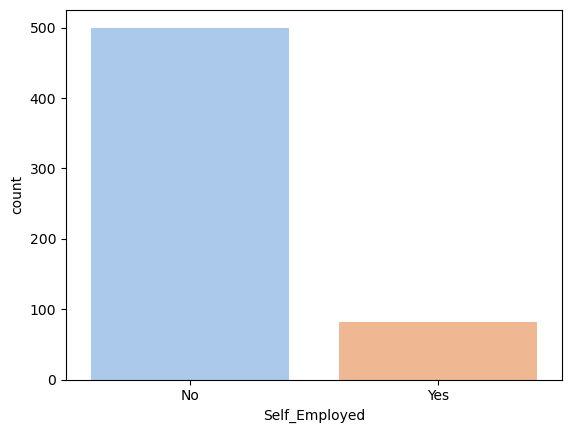

In [14]:
# Using function to get value counts, percentages and visualization
col_percentages(loan_df,'Self_Employed', 'No', 'Yes')

### Education Percentages/Counts

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------------------------


Percentage of Education Graduate:  78.17589576547232
percentage of Education Not Graduate: 21.824104234527688
Percentage of Missing:  0.0
--------------------------




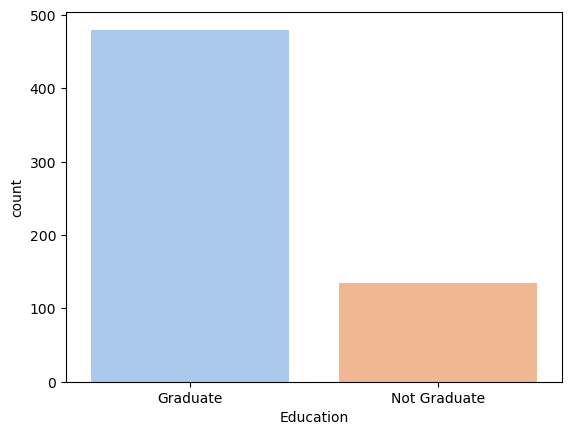

In [15]:
# Using function to get value counts, percentages and visualization
col_percentages(loan_df, 'Education', 'Graduate', 'Not Graduate')

### Credit History Percentages/Counts

1.0    475
0.0     89
Name: Credit_History, dtype: int64
--------------------------


Percentage of Credit_History 1.0:  77.36156351791531
percentage of Credit_History 0.0: 14.495114006514658
Percentage of Missing:  8.143322475570033
--------------------------




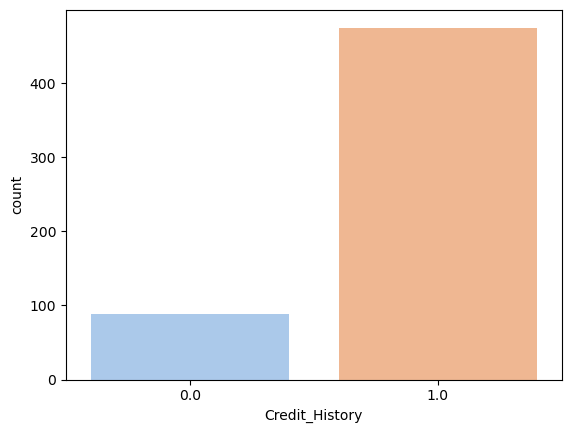

In [16]:
# Using function to get value counts, percentages and visualization
col_percentages(loan_df, 'Credit_History', 1, 0)

### Property Area Percentages/Counts

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
--------------------------


Percentage of Property_Area Semiurban:  37.94788273615635
percentage of Property_Area Urban: 32.89902280130293
percentage of Property_Area Rural: 29.153094462540718
Percentage of Missing:  0.0
--------------------------




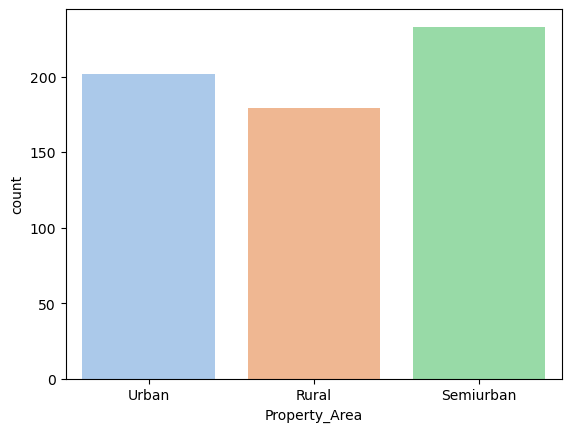

In [17]:
# Using function to get value counts, percentages and visualization
col_percentages(loan_df, 'Property_Area', 'Semiurban', 'Urban', 'Rural')

### Loan Status (Target) Percentages/Counts

Y    422
N    192
Name: Loan_Status, dtype: int64
--------------------------


Percentage of Loan_Status Y:  68.72964169381108
percentage of Loan_Status N: 31.27035830618892
Percentage of Missing:  0.0
--------------------------




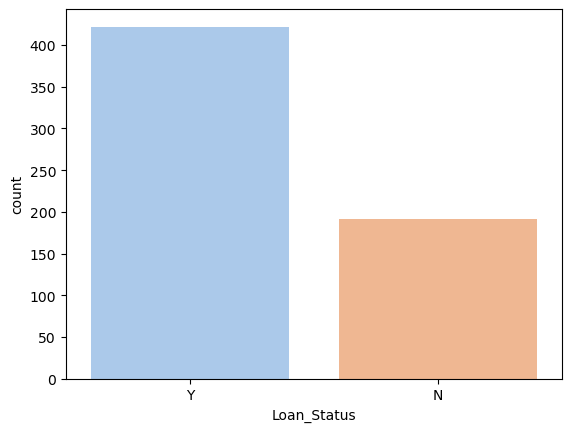

In [18]:
# Using function to get value counts, percentages and visualization
col_percentages(loan_df, 'Loan_Status', 'Y', 'N')

### Loan Amount Term

In [19]:
#This visualization could not be used in the value as it has more than 3 values associated
months_12 = len(df[df.Loan_Amount_Term == 12.0])
months_36 = len(df[df.Loan_Amount_Term == 36.0])
months_60 = len(df[df.Loan_Amount_Term == 60.0])
months_84 = len(df[df.Loan_Amount_Term == 84.0])
months_120 = len(df[df.Loan_Amount_Term == 120.0])
months_180 = len(df[df.Loan_Amount_Term == 180.0])
months_240 = len(df[df.Loan_Amount_Term == 240.0])
months_300 = len(df[df.Loan_Amount_Term == 300.0])
months_360 = len(df[df.Loan_Amount_Term == 360.0])
months_480 = len(df[df.Loan_Amount_Term == 480.0])
missing_counts = len(df[df.Loan_Amount_Term.isnull()])

print('Percentage of 12 months loan: ', (months_12/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 36 months loan: ', (months_36/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 60 months loan: ', (months_60/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 84 months loan: ', (months_84/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 120 months loan: ', (months_120/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 180 months loan: ', (months_180/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 240 months loan: ', (months_240/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 300 months loan: ', (months_300/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 360 months loan: ', (months_360/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of 480 months loan: ', (months_480/len(loan_df['Loan_Amount_Term'])*100))
print('Percentage of missing values loan: ', (missing_counts/len(loan_df['Loan_Amount_Term'])*100))
                            

Percentage of 12 months loan:  0.16286644951140067
Percentage of 36 months loan:  0.32573289902280134
Percentage of 60 months loan:  0.32573289902280134
Percentage of 84 months loan:  0.6514657980456027
Percentage of 120 months loan:  0.4885993485342019
Percentage of 180 months loan:  7.166123778501629
Percentage of 240 months loan:  0.6514657980456027
Percentage of 300 months loan:  2.1172638436482085
Percentage of 360 months loan:  83.38762214983714
Percentage of 480 months loan:  2.44299674267101
Percentage of missing values loan:  2.2801302931596092


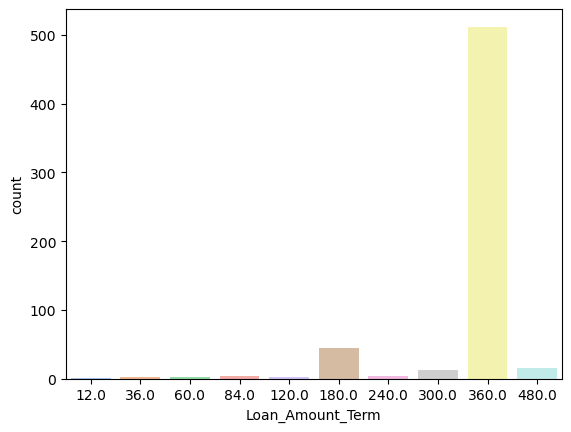

In [20]:
#Plotting Loan Amount terms 
sns.countplot(x="Loan_Amount_Term", data=loan_df, palette="pastel")
plt.show()

## Numerical Variables

In [21]:
#Creating a dataframe with only numerical columns for easy plotting
loan_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,54034.592834,16212.457980,146412.162162
std,61090.416734,29262.483692,85587.325236
min,1500.000000,0.000000,9000.000000
25%,28775.000000,0.000000,100000.000000
50%,38125.000000,11885.000000,128000.000000
75%,57950.000000,22972.500000,168000.000000
max,810000.000000,416670.000000,700000.000000


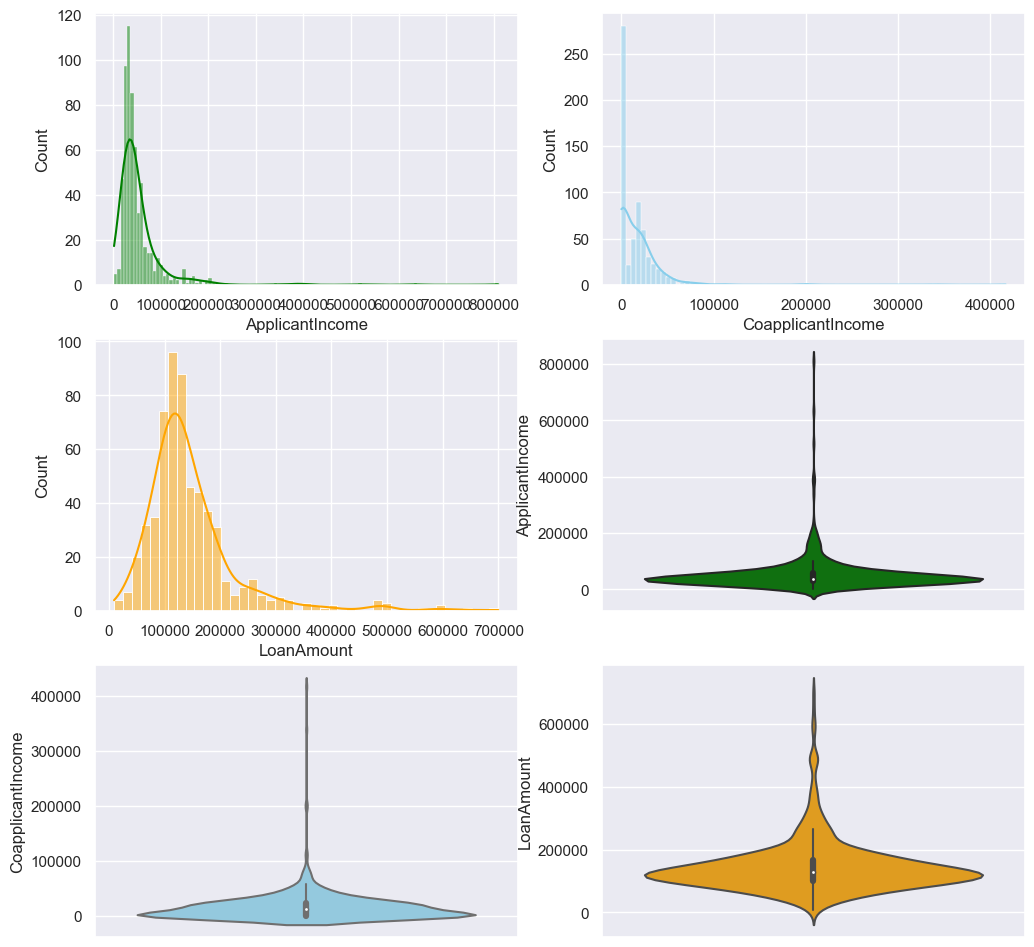

In [22]:
# Plotting the distributions of the numerical variables for outlier detection and possible modification to make a normal
#distribution

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

sns.histplot(data=loan_df, x="ApplicantIncome", kde=True, ax=axes[0, 0], color='green')
sns.histplot(data=loan_df, x="CoapplicantIncome", kde=True, ax=axes[0, 1], color='skyblue')
sns.histplot(data=loan_df, x="LoanAmount", kde=True, ax=axes[1, 0], color='orange')
sns.violinplot(data=loan_df, y="ApplicantIncome", kde=True, ax=axes[1, 1], color='green')
sns.violinplot(data=loan_df, y="CoapplicantIncome", kde=True, ax=axes[2, 0], color='skyblue')
sns.violinplot(data=loan_df, y="LoanAmount", ax=axes[2, 1], kde=True, color='orange');

### Heatmap

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_23600\3185642390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_df.corr().round(2), annot=True);


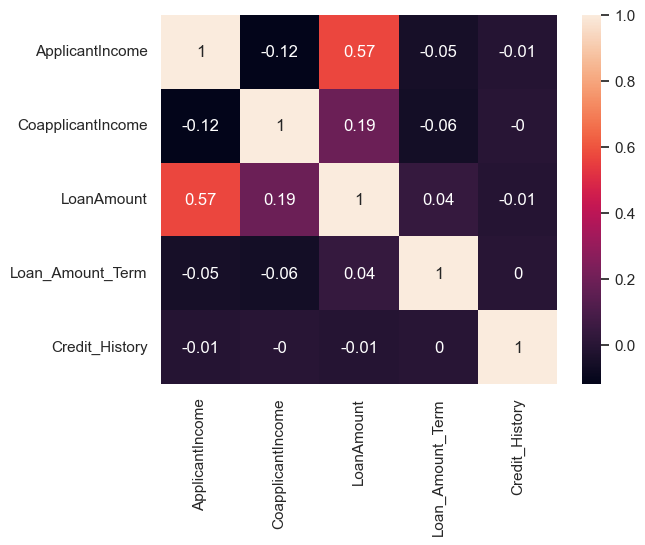

In [23]:
# Checking correlated values
sns.heatmap(loan_df.corr().round(2), annot=True);

## Categorical - Categorical

### Gender vs Married

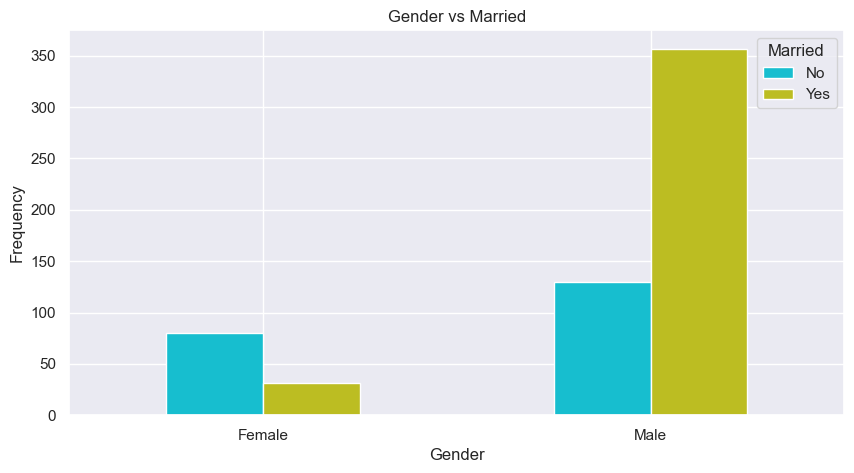

In [24]:
#Plotting gender and whether they were married
pd.crosstab(df['Gender'], df['Married']).plot(kind="bar", figsize=(10,5), color=['tab:cyan', 'tab:olive'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### Self-Employed vs Credit History

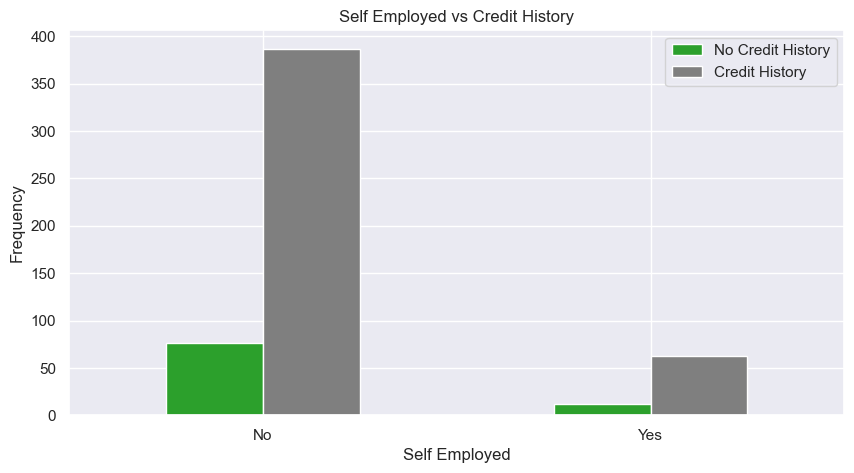

In [25]:
# Plotting self employed individuals and whether they have credit history or not
pd.crosstab(df['Self_Employed'], df['Credit_History']).plot(kind="bar", figsize=(10,5), color=['tab:green','tab:gray'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["No Credit History", "Credit History"])
plt.xticks(rotation=0)
plt.show()

### Property Area vs Loan Status

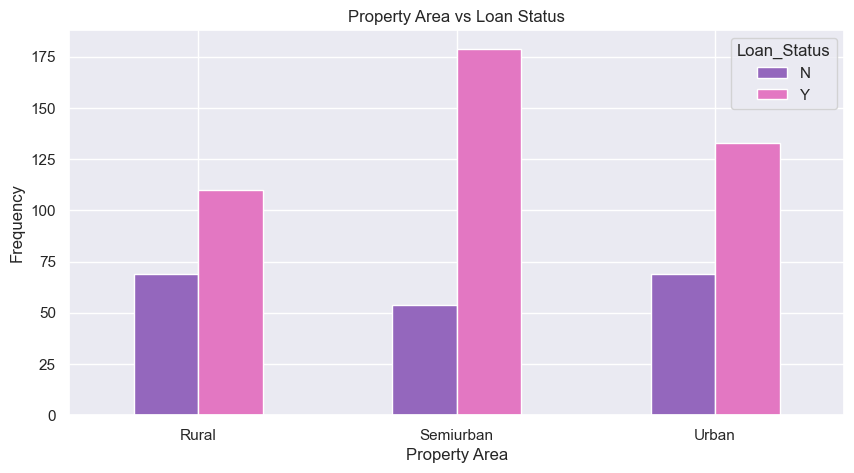

In [26]:
# Plotting people who live in a specific area and whether they were approved or not
pd.crosstab(df['Property_Area'], df['Loan_Status']).plot(kind="bar", figsize=(10,5), color=['tab:purple','tab:pink'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Categorical - Numerical

### Loan Status vs Applicant Income

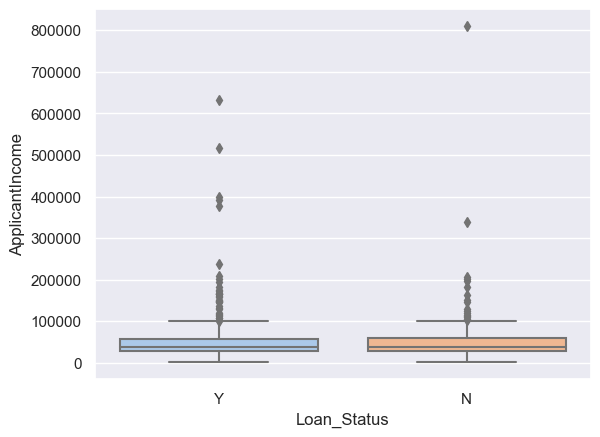

In [27]:
#Plotting applicant incomes and whether they were approved
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=loan_df, palette="pastel");

### Coapplicant Income vs Loan Status

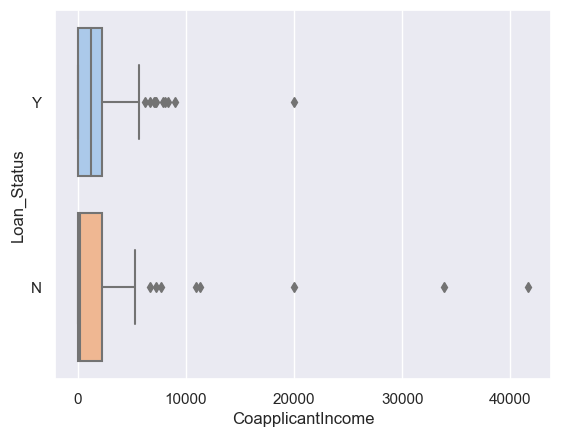

In [28]:
#Plotting coapplicant incomes and whether they were approved
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="pastel");

### Loan Status vs Loan Amount

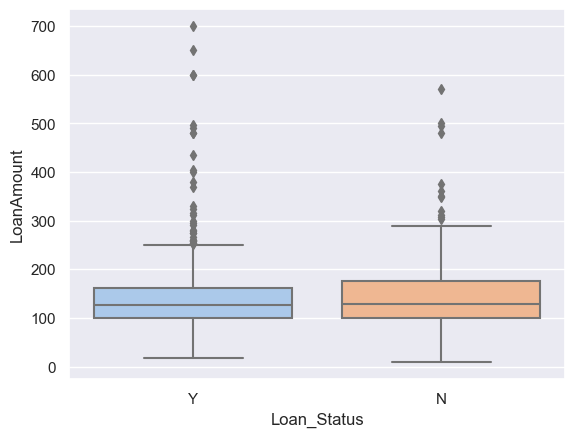

In [29]:
#Plotting the loan amounts and whether they were approved or not 
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="pastel");

# Model Preparation

## Model Preprocessing

In [30]:
# Changing target to numerical values
loan_df['Loan_Status'] = loan_df['Loan_Status'].map(dict(N= 0, Y= 1))

In [31]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,58490,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,45830,15080.0,128000.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,30000,0.0,66000.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,25830,23580.0,120000.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,60000,0.0,141000.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,29000,0.0,71000.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,41060,0.0,40000.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,80720,2400.0,253000.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,75830,0.0,187000.0,360.0,1.0,Urban,1


### Dropping unncessary columns

In [32]:
loan_df.drop('Loan_ID', axis=1, inplace=True)

In [33]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,58490,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,45830,15080.0,128000.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,30000,0.0,66000.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,25830,23580.0,120000.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,60000,0.0,141000.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,29000,0.0,71000.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,41060,0.0,40000.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,80720,2400.0,253000.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,75830,0.0,187000.0,360.0,1.0,Urban,1


## Train Test Split

In [34]:
#Creating a train set to train models on and creating a test set to check how to model is performing on unknown data
X = loan_df.drop('Loan_Status', axis=1)
y = loan_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

### Splitting Categorical and Numerical columns for processing

In [35]:
# Splitting our data into two different 
X_train_cat = X_train[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']]
X_train_num = X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

### Imputing and Scaling/One hot encoding data

In [36]:
#Setting pipeline for processing steps for numeric and categorical data
#This code utilizes pipelines to do all of the preprocessing steps to avoid data leakage mistakes

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('ss', StandardScaler())
])
                
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore',
                         sparse=False))
])

#Using column transformer to transform data for modeling
transformer = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, X_train_num.columns),
    ('categorical', cat_pipeline, X_train_cat.columns)])

# Modeling 

## Logistic Regression

### Baseline Logistic Regression using Pipeline

In [37]:
#Setting the pipeline with the transformer that modifies the data the same way it was done manually and adding the model
#as the next step
baseline_logreg_pipe = Pipeline(steps=[
    ('transformer', transformer),
    ('logreg', LogisticRegression(class_weight = 'balanced', random_state=2))])

In [38]:
#Fitting the model so that the model can learn
baseline_logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History', 'Loan_Amount_Term'],
      dtype='object'))])),
                ('logreg',
                 LogisticRegression(class_weight='balanced', random_state=2))])

#### Checking on the Train set

In [39]:
#Making predictions on the train set
lr_base_y_pred = baseline_logreg_pipe.predict(X_train)

In [40]:
#Cross validating the see if our score does well through different scrambles of information
scores = cross_val_score(baseline_logreg_pipe, X_train, y_train, cv=5 )
scores.mean()

0.7586956521739131

In [41]:
#Checking our metrics to see how well our model performed
print(classification_report(y_train, lr_base_y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       143
           1       0.83      0.88      0.85       317

    accuracy                           0.79       460
   macro avg       0.76      0.74      0.75       460
weighted avg       0.79      0.79      0.79       460



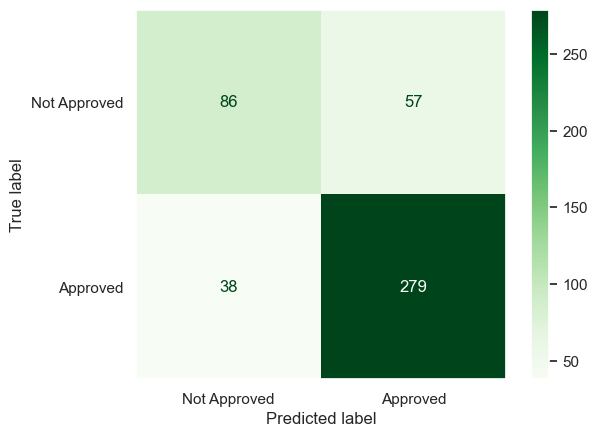

In [42]:
#Visualizing the choices that the model made and the true values
ConfusionMatrixDisplay.from_predictions(y_train, lr_base_y_pred, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

### Logistic Regression Using Gridsearch (with Pipeline)

In [43]:
# Setting up our pipeline with processing steps and our model into a variable
logreg_gs_pipe = Pipeline(steps=[
    ('transformer', transformer),
    ('logreg', LogisticRegression(class_weight = 'balanced', random_state=2))])

In [44]:
# Setting up grid parameters to make multiple models
logreg_grid_params = {'logreg__penalty': ['l1', 'l2', 'none'],
                    'logreg__C': [1, .01, .001],
                    'logreg__solver':['liblinear', 'lbfgs'],
                    'logreg__max_iter':[100, 1000, 10000]
    
}

In [45]:
#Inputting model, grid parameters and having a cross validation of 5
logreg_gs =GridSearchCV(estimator=logreg_gs_pipe, param_grid = logreg_grid_params, cv = 5)

In [46]:
#Fitting model to processed train 
logreg_gs.fit(X_train, y_train)

C:\Users\Jonathan\anaconda3\envs\test-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonathan\anaconda3\envs\test-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

C:\Users\Jonathan\anaconda3\envs\test-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jonathan\anaconda3\envs\test-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jonathan\anaconda3\envs\test-env\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Jonathan\anaconda3\envs\test-env\lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),...
                                                                         Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History', 'Loan_Amount_Term'],
      dtype='object'))])),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=2))]),
             param_grid={'logreg__C': [1, 0.01, 0.001],
                         'logreg__max_iter': [100, 1000, 10000],
                         'logreg__penalty': ['l1', 'l2', 'none'],
                         'logreg__solver': ['liblinear', 'lbfgs']})

#### Checking on the Train set

In [47]:
# Checking the best parameters chosen by the grid search
logreg_gs.best_params_

{'logreg__C': 0.001,
 'logreg__max_iter': 100,
 'logreg__penalty': 'l2',
 'logreg__solver': 'liblinear'}

In [48]:
# Checking the best score chosen by the grid search
logreg_gs.best_score_

0.808695652173913

In [49]:
# Checking the best estimated score chosen by the grid search
logreg_gs.best_estimator_.score(X_train, y_train)

0.8152173913043478

In [50]:
# Saving our predictions to a variable
lr_gs_y_pred = logreg_gs.predict(X_train)

In [51]:
#Checking our metrics to see how well our model performed
print(classification_report(y_train, lr_gs_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61       143
           1       0.80      0.97      0.88       317

    accuracy                           0.82       460
   macro avg       0.84      0.72      0.75       460
weighted avg       0.83      0.82      0.80       460



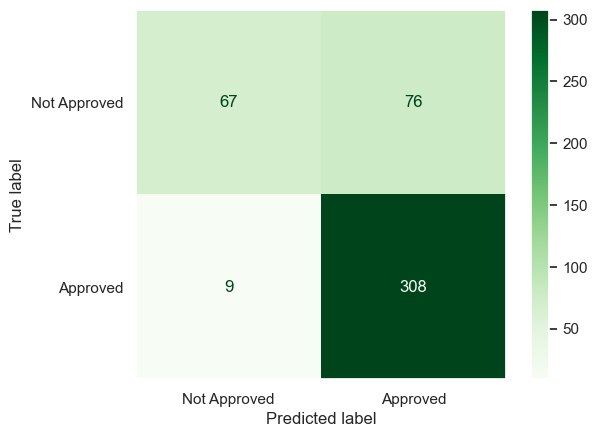

In [52]:
#Visualizing the choices that the model made and the true values
ConfusionMatrixDisplay.from_predictions(y_train, lr_gs_y_pred, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

### Using Best model on Test set (Logistic Regression Using Gridsearch)

In [53]:
# Saving our test predictions to a variable
test_y_pred_gs_pipe = logreg_gs.predict(X_test)

In [54]:
#Checking our metrics to see how well our model performed
print(classification_report(y_test, test_y_pred_gs_pipe))

              precision    recall  f1-score   support

           0       0.79      0.39      0.52        49
           1       0.77      0.95      0.85       105

    accuracy                           0.77       154
   macro avg       0.78      0.67      0.69       154
weighted avg       0.78      0.77      0.75       154



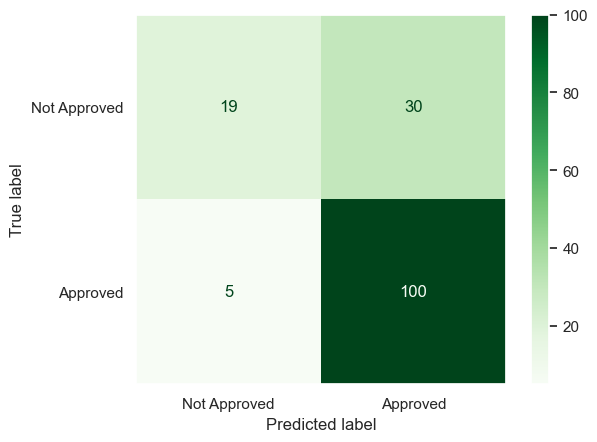

In [55]:
#Visualizing the choices that the model made and the true values on the test set
ConfusionMatrixDisplay.from_predictions(y_test, test_y_pred_gs_pipe, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

#### Summary of best model

It seems like the gridsearched model that included these parameters:

* C: 0.001,
* max_iter: 100,
* penalty: 'l2',
* solver: 'liblinear'

had the best performance of all of the models for Logistic Regression. Out of the 105 approved applications, it was able to correctly identify 100 of them so the rate for correct guesses for the "Approved" category was 95%. However, Out of the 49 not approved applications, it was fairly off as it guessed 19 correctly. The rate for correct guesses for the "Not Approved" category was 38%.

### Checking feature importances of best model

In [56]:
# Extracting coefficients of the model for importance checks
importances = logreg_gs.best_estimator_.named_steps['logreg'].coef_[0,:]
importances

array([ 9.26584005e-04, -1.94858576e-02, -3.45156072e-03, -8.25835702e-04,
       -1.56842641e-03, -9.35007897e-03,  6.95581686e-03, -5.15325151e-03,
       -1.97337361e-03,  5.04427663e-03, -3.11913629e-04,  6.59552338e-03,
       -8.98978549e-03,  7.37512775e-05, -2.46801339e-03, -1.21568341e-02,
        1.74681271e-02, -7.70555509e-03, -4.74837861e-02,  4.50895240e-02,
        3.56310107e-04, -1.65193668e-03,  3.55499166e-04,  2.36682167e-04,
        1.05357415e-03,  1.78797417e-03, -1.26879172e-04, -3.63008391e-04,
        2.09326633e-04, -4.25180426e-03])

In [57]:
#Pulling feature names from the one hot encoded variables
onehot_cols = (
    transformer
    .named_transformers_["categorical"]
    .named_steps["ohe"]
    .get_feature_names_out(X_train_cat.columns)
)
onehot_cols

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0',
       'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0',
       'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0'], dtype=object)

In [58]:
#Combining numerical columns and One Hot Encoded Columns
columns = X_train_num.columns.tolist() + onehot_cols.tolist()

In [59]:
#Checking results
columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Credit_History_0.0',
 'Credit_History_1.0',
 'Loan_Amount_Term_12.0',
 'Loan_Amount_Term_36.0',
 'Loan_Amount_Term_60.0',
 'Loan_Amount_Term_84.0',
 'Loan_Amount_Term_120.0',
 'Loan_Amount_Term_180.0',
 'Loan_Amount_Term_240.0',
 'Loan_Amount_Term_300.0',
 'Loan_Amount_Term_360.0',
 'Loan_Amount_Term_480.0']

In [60]:
# Combining feature importance values to their columns
column_importances = list(zip(columns, importances))
column_importances

[('ApplicantIncome', 0.0009265840051179447),
 ('CoapplicantIncome', -0.019485857634405093),
 ('LoanAmount', -0.0034515607195964304),
 ('Gender_Female', -0.0008258357024047093),
 ('Gender_Male', -0.0015684264090781977),
 ('Married_No', -0.00935007897055223),
 ('Married_Yes', 0.006955816859069378),
 ('Dependents_0', -0.005153251505909368),
 ('Dependents_1', -0.0019733736063221353),
 ('Dependents_2', 0.005044276629259929),
 ('Dependents_3+', -0.0003119136285113248),
 ('Education_Graduate', 0.006595523380104149),
 ('Education_Not Graduate', -0.008989785491587023),
 ('Self_Employed_No', 7.375127751162287e-05),
 ('Self_Employed_Yes', -0.0024680133889944706),
 ('Property_Area_Rural', -0.012156834094494726),
 ('Property_Area_Semiurban', 0.017468127068442963),
 ('Property_Area_Urban', -0.007705555085431098),
 ('Credit_History_0.0', -0.04748378606506799),
 ('Credit_History_1.0', 0.045089523953585134),
 ('Loan_Amount_Term_12.0', 0.0003563101074948476),
 ('Loan_Amount_Term_36.0', -0.00165193668222

In [61]:
#Creating a dataframe to make the data easier for visualization
ci_df = pd.DataFrame({"Columns": columns,
                   "Importances": importances})
ci_df

,Columns,Importances
0,ApplicantIncome,0.000927
1,CoapplicantIncome,-0.019486
2,LoanAmount,-0.003452
3,Gender_Female,-0.000826
4,Gender_Male,-0.001568
5,Married_No,-0.009350
6,Married_Yes,0.006956
7,Dependents_0,-0.005153
8,Dependents_1,-0.001973
9,Dependents_2,0.005044


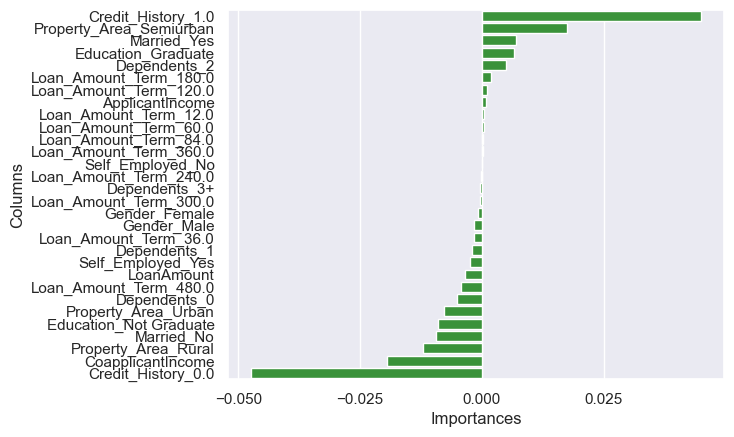

In [62]:
# Checking which features were more important to the model
sns.barplot(x = ci_df['Importances'], 
            y = ci_df['Columns'], 
            data = ci_df,
            color = 'tab:green',
            order = ci_df.sort_values('Importances', ascending=False).Columns,
            orient = 'h')
sns.set(rc={'figure.figsize':(30,30)},font_scale= 2)
plt.show()

#### Summary of feature importances

According to the coefficients provided by the best Logistic Regression model, the most positively impactful feature on the model was when someone had credit history. The most negatively impactful feature was when someone did not have credit history. Credit history played a huge role in this model.

## Random Forest

### Baseline Random Forest using Pipeline

In [63]:
baseline_rf_pipe = Pipeline(steps=[
    ('transformer', transformer),
    ('rf', RandomForestClassifier(random_state=1, class_weight= 'balanced'))])

In [64]:
baseline_rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History', 'Loan_Amount_Term'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=1))])

#### Checking on the Train set

In [65]:
#Making predictions on the train set
rf_base_y_pred = baseline_rf_pipe.predict(X_train)

In [66]:
#Cross validating the see if our score does well through different scrambles of information
scores = cross_val_score(baseline_rf_pipe, X_train, y_train, cv=5 )
scores.mean()

0.8043478260869564

In [67]:
#Checking our metrics to see how well our model performed
print(classification_report(y_train, rf_base_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       317

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



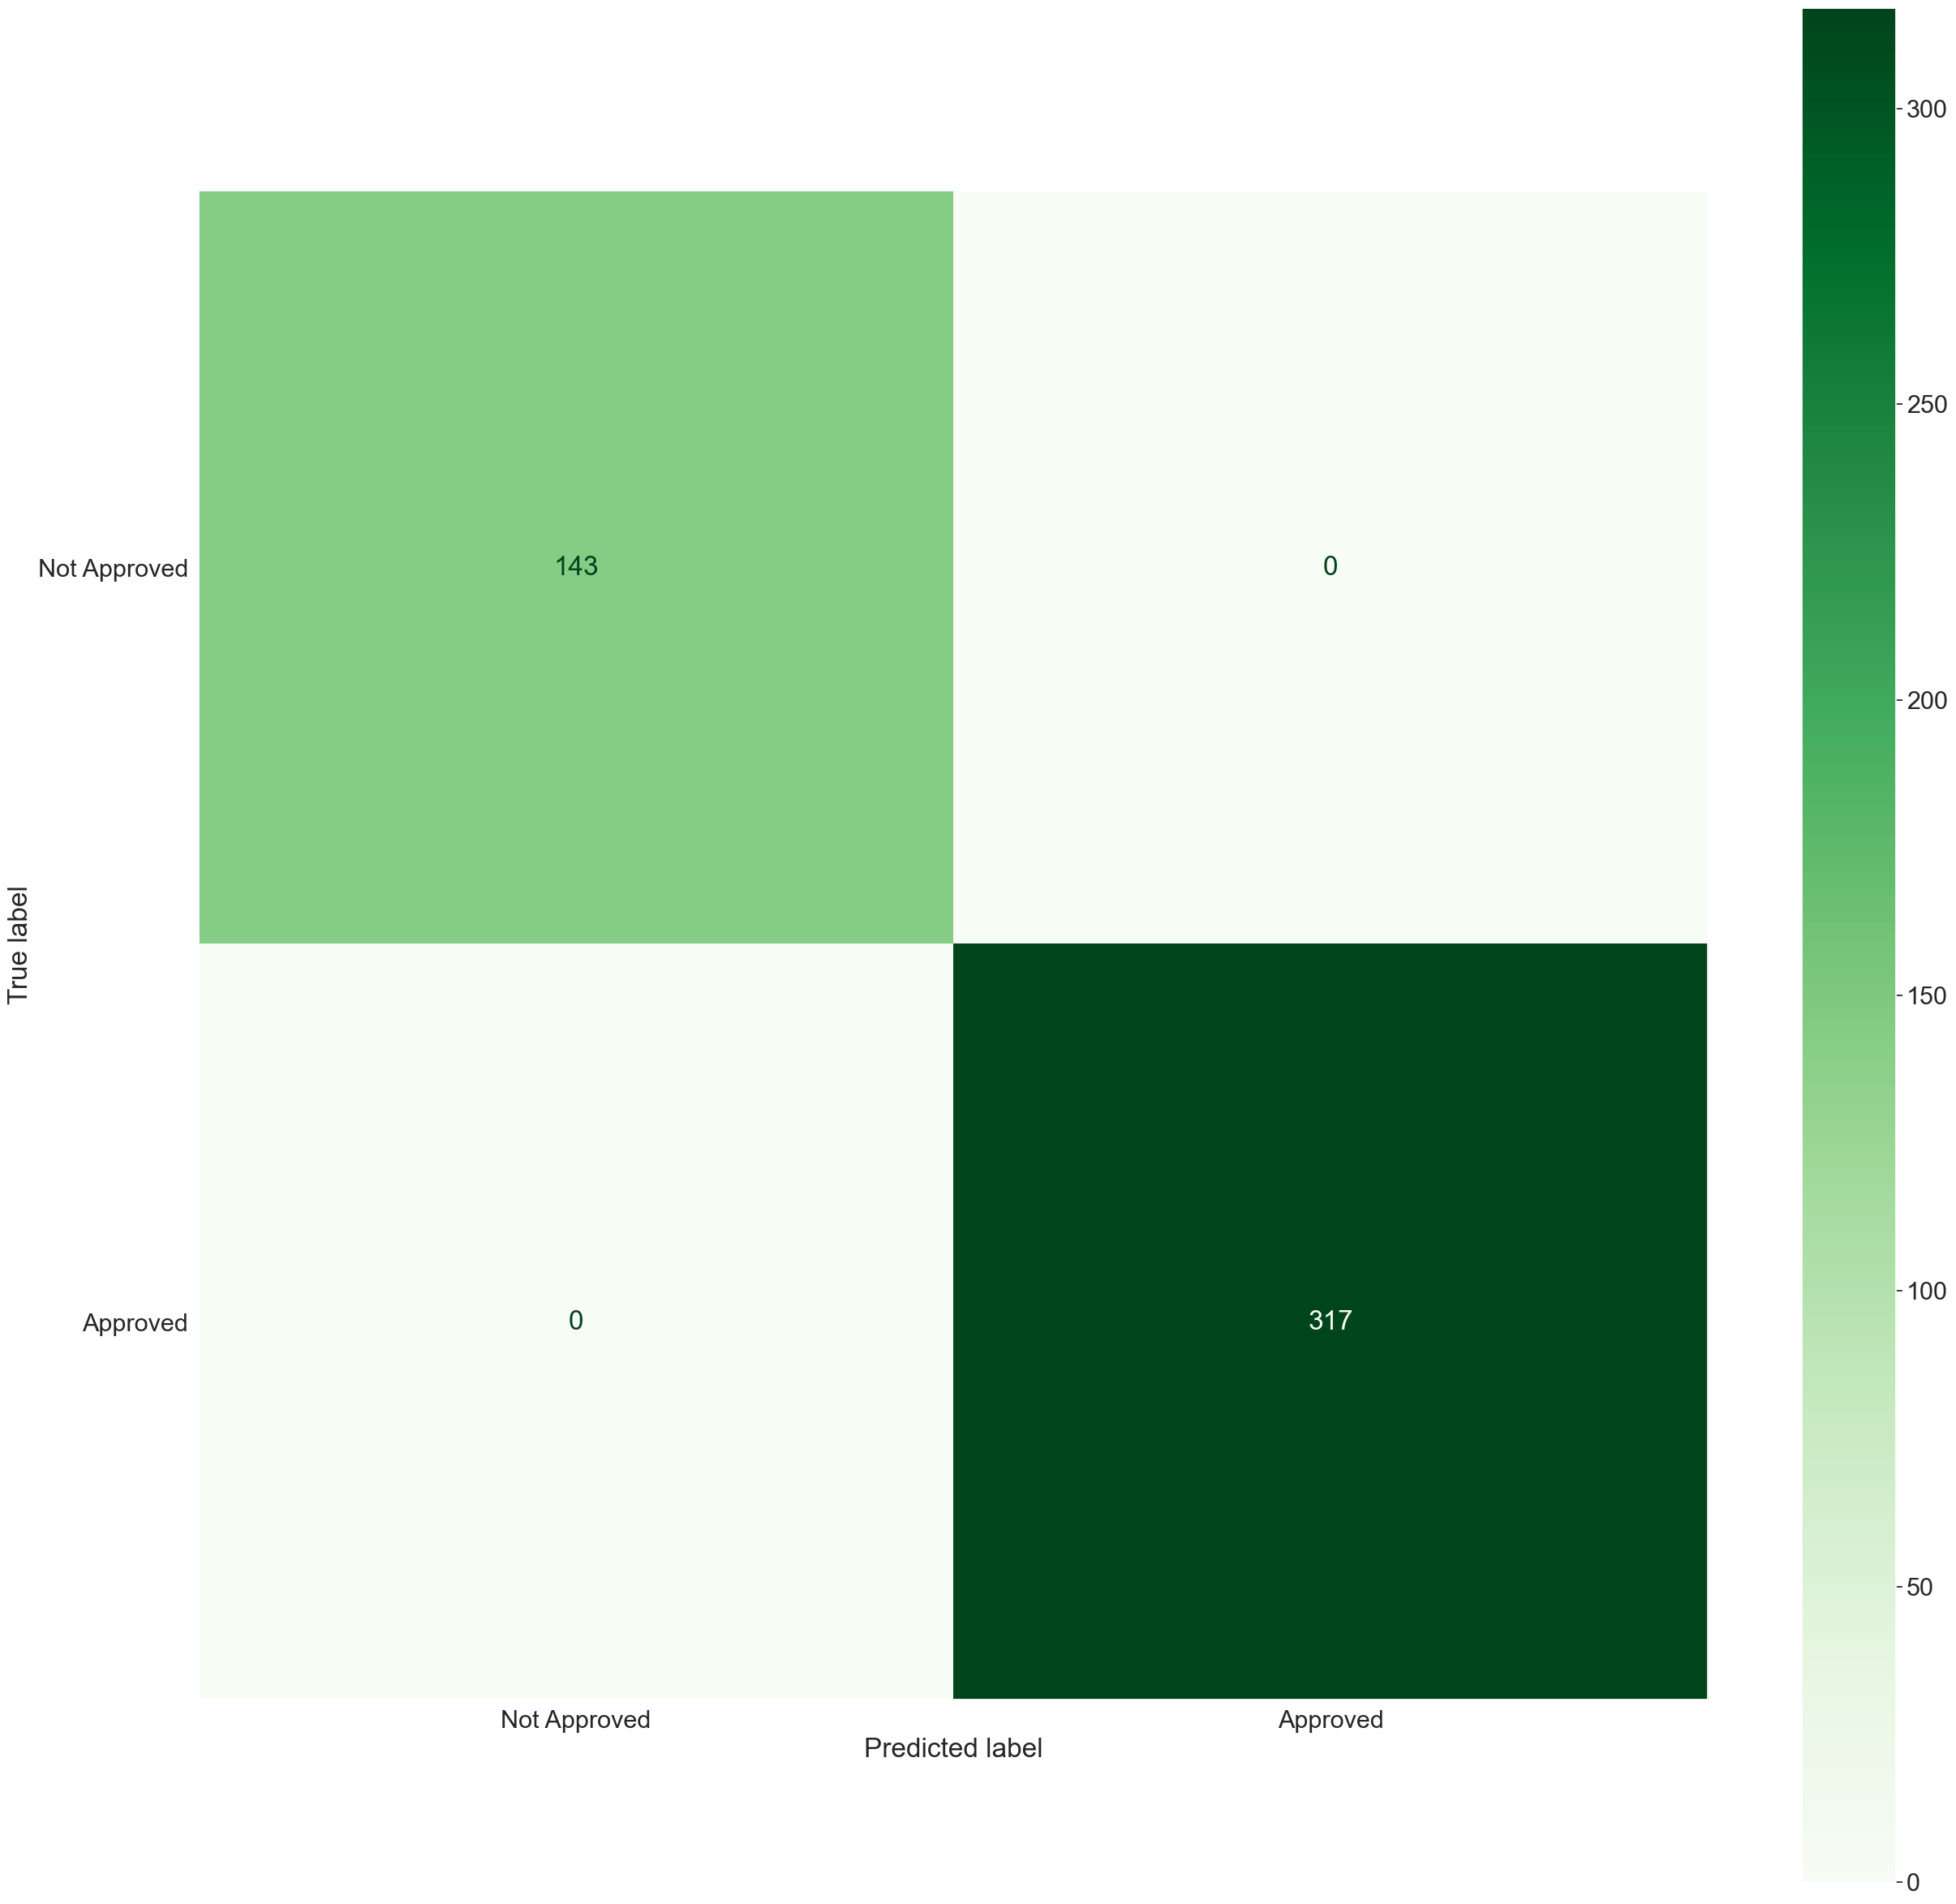

In [68]:
#Visualizing the choices that the model made and the true values
ConfusionMatrixDisplay.from_predictions(y_train, rf_base_y_pred, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

### Random Forest Using Gridsearch (with Pipeline)

In [69]:
rf_gs_pipe = Pipeline(steps=[
    ('transformer', transformer),
    ('rf', RandomForestClassifier(random_state= 2, class_weight='balanced'))])

In [70]:
#Setting of parameters for gridsearch to use
rf_grid = {'rf__criterion': ['gini', 'entropy'],
           'rf__max_depth': [3, 5, 10, 30, 50],
           'rf__min_samples_split':[2, 10, 30, 50],
           'rf__n_estimators':[10, 50, 100, 200]
           
           
}

In [71]:
#Applying pipeline and grid for the Gridsearch
rf_gs = GridSearchCV(estimator= rf_gs_pipe, param_grid = rf_grid, cv = 5)

In [72]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),...
                                                                         Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History', 'Loan_Amount_Term'],
      dtype='object'))])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=2))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [3, 5, 10, 30, 50],
                         'rf__min_samples_split': [2, 10, 30, 50],
                         'rf__n_estimators': [10, 50, 100, 200]})

#### Checking on the Train set

In [73]:
# Checking the best parameters chosen by the grid search
rf_gs.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 3,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 50}

In [74]:
# Checking the best score chosen by the grid search
rf_gs.best_score_

0.8217391304347826

In [75]:
# Checking the best estimated score chosen by the grid search
rf_gs.best_estimator_.score(X_train, y_train)

0.8326086956521739

In [76]:
# Saving our predictions to a variable
rf_gs_y_pred = rf_gs.predict(X_train)

In [77]:
#Checking our metrics to see how well our model performed
print(classification_report(y_train, rf_gs_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.50      0.65       143
           1       0.81      0.98      0.89       317

    accuracy                           0.83       460
   macro avg       0.87      0.74      0.77       460
weighted avg       0.85      0.83      0.82       460



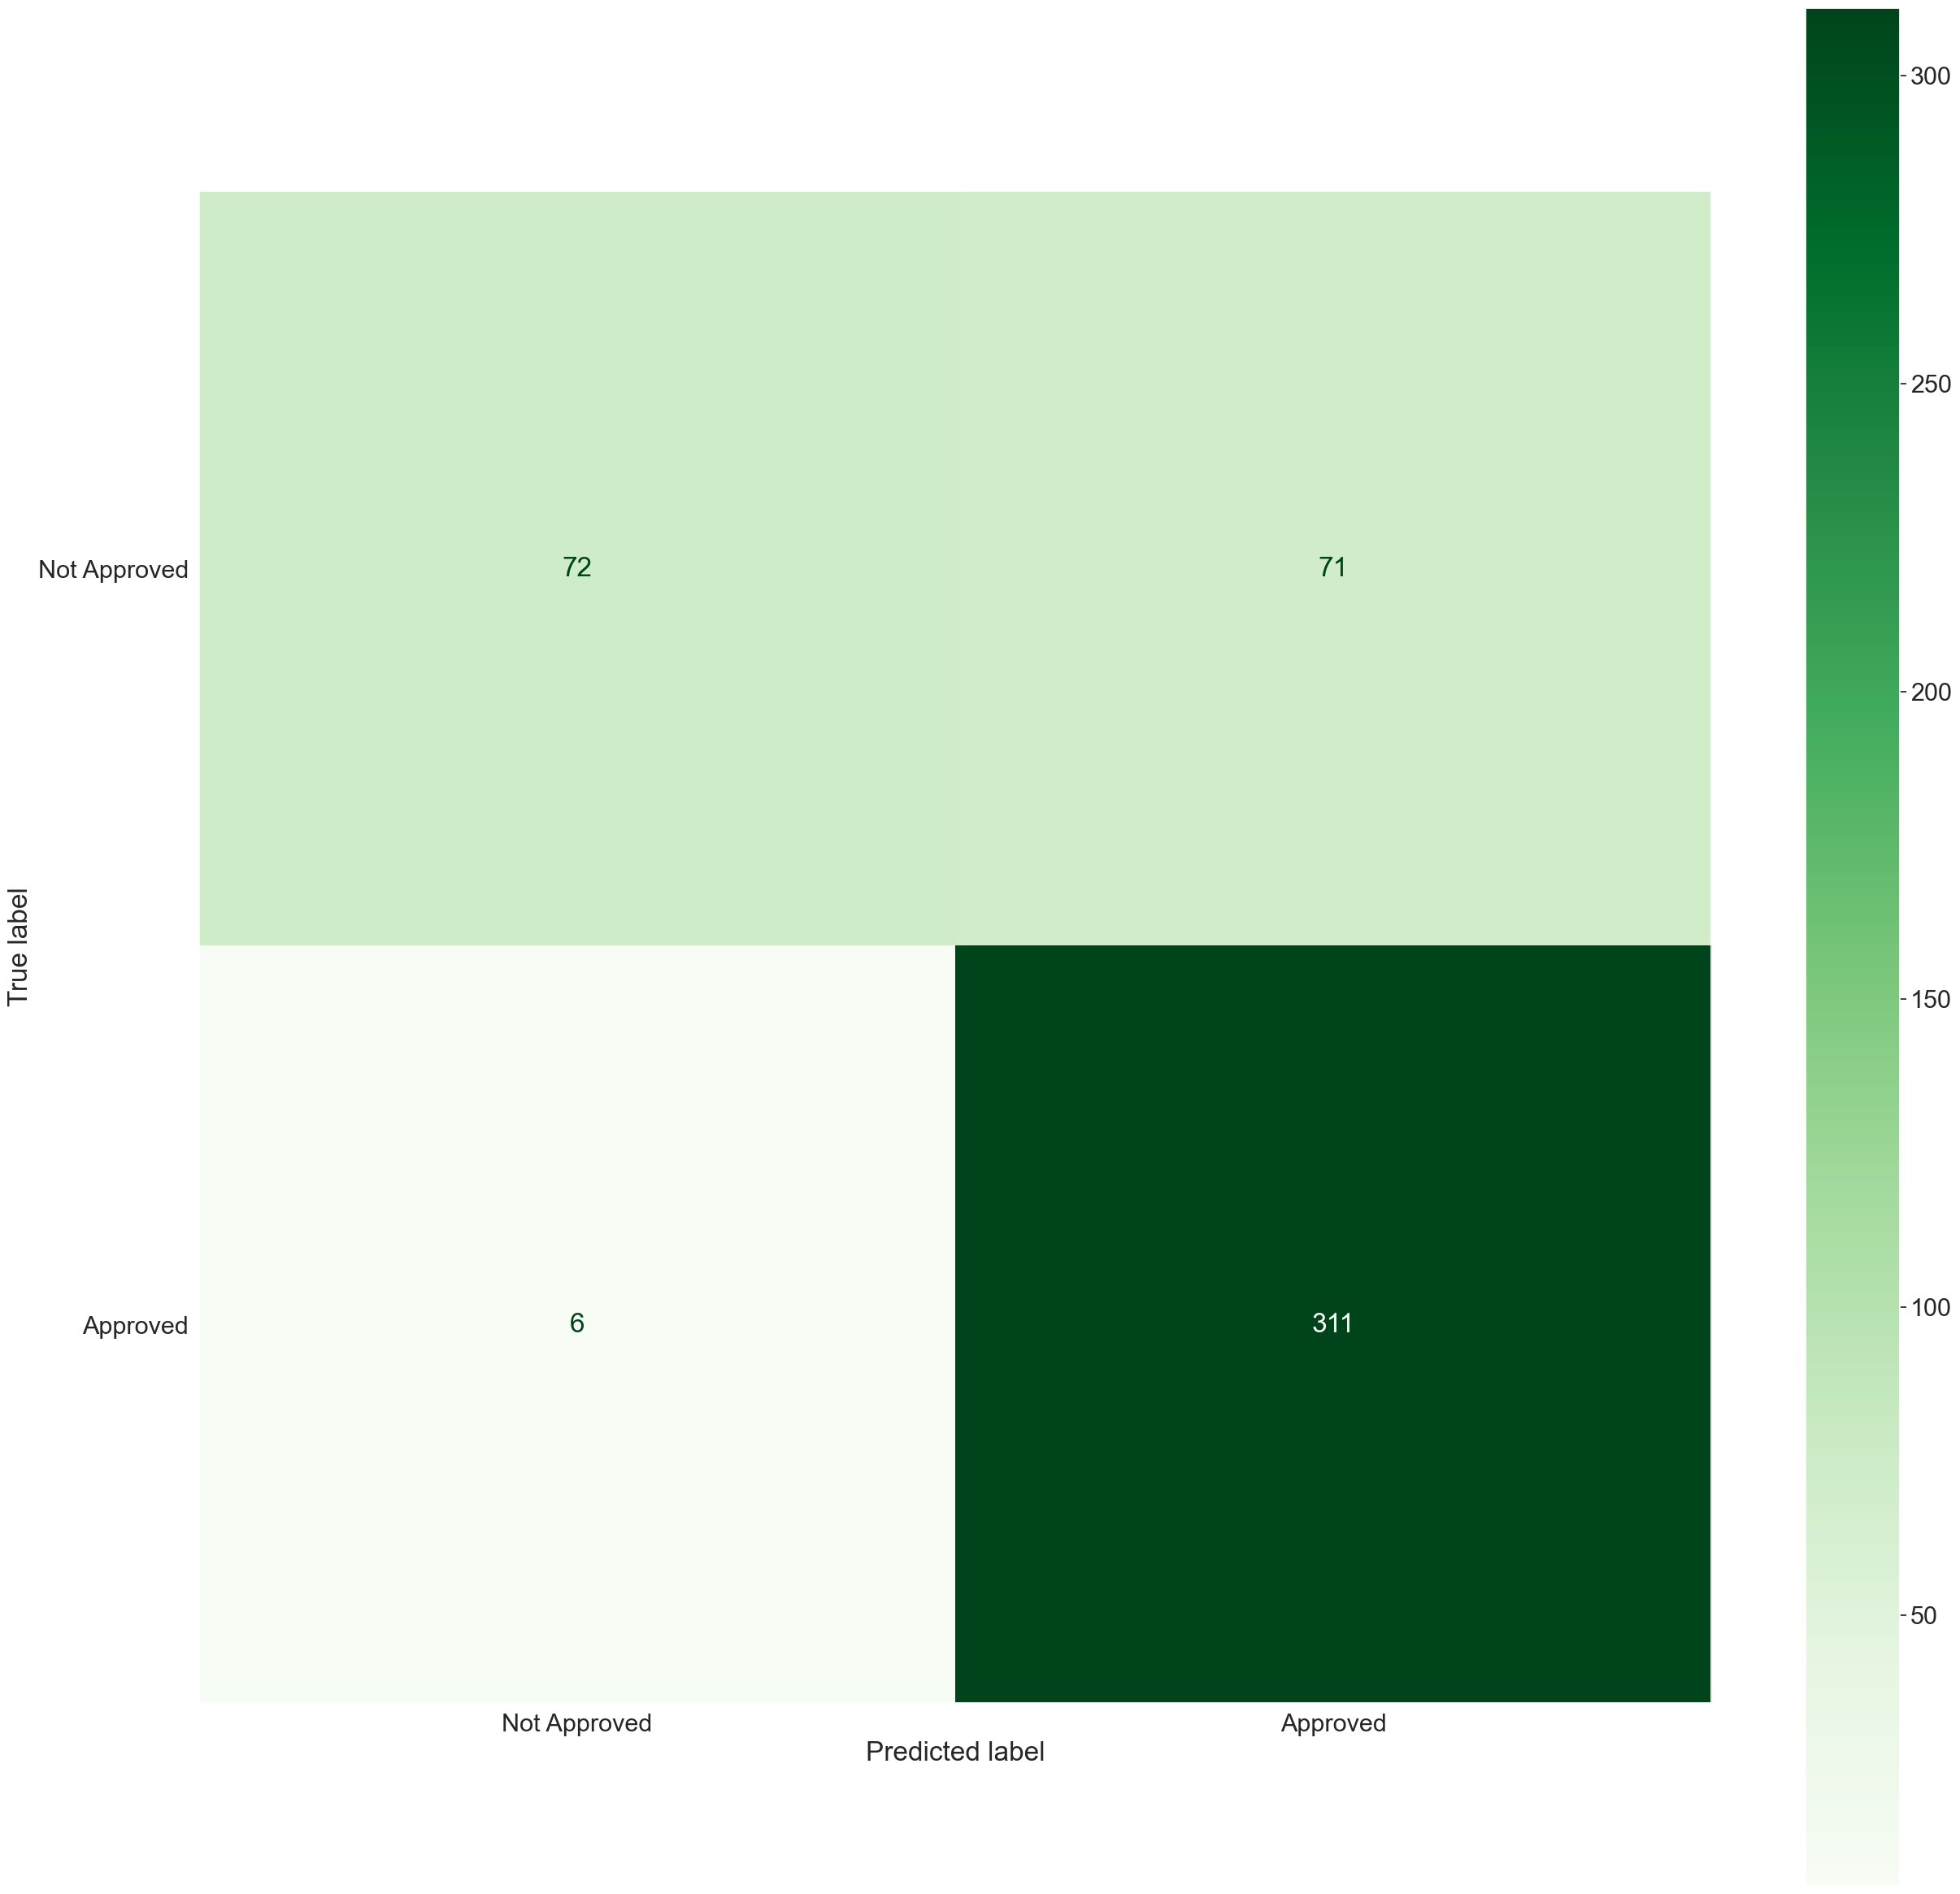

In [78]:
#Visualizing the choices that the model made and the true values
ConfusionMatrixDisplay.from_predictions(y_train, rf_gs_y_pred, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

### Using Best model on Test set (Random Forest Using Gridsearch)

In [79]:
# Saving our test predictions to a variable
rf_test_y_pred_gs_pipe = rf_gs.predict(X_test)

In [80]:
#Checking our metrics to see how well our model performed
print(classification_report(y_test, rf_test_y_pred_gs_pipe))

              precision    recall  f1-score   support

           0       0.83      0.39      0.53        49
           1       0.77      0.96      0.86       105

    accuracy                           0.78       154
   macro avg       0.80      0.67      0.69       154
weighted avg       0.79      0.78      0.75       154



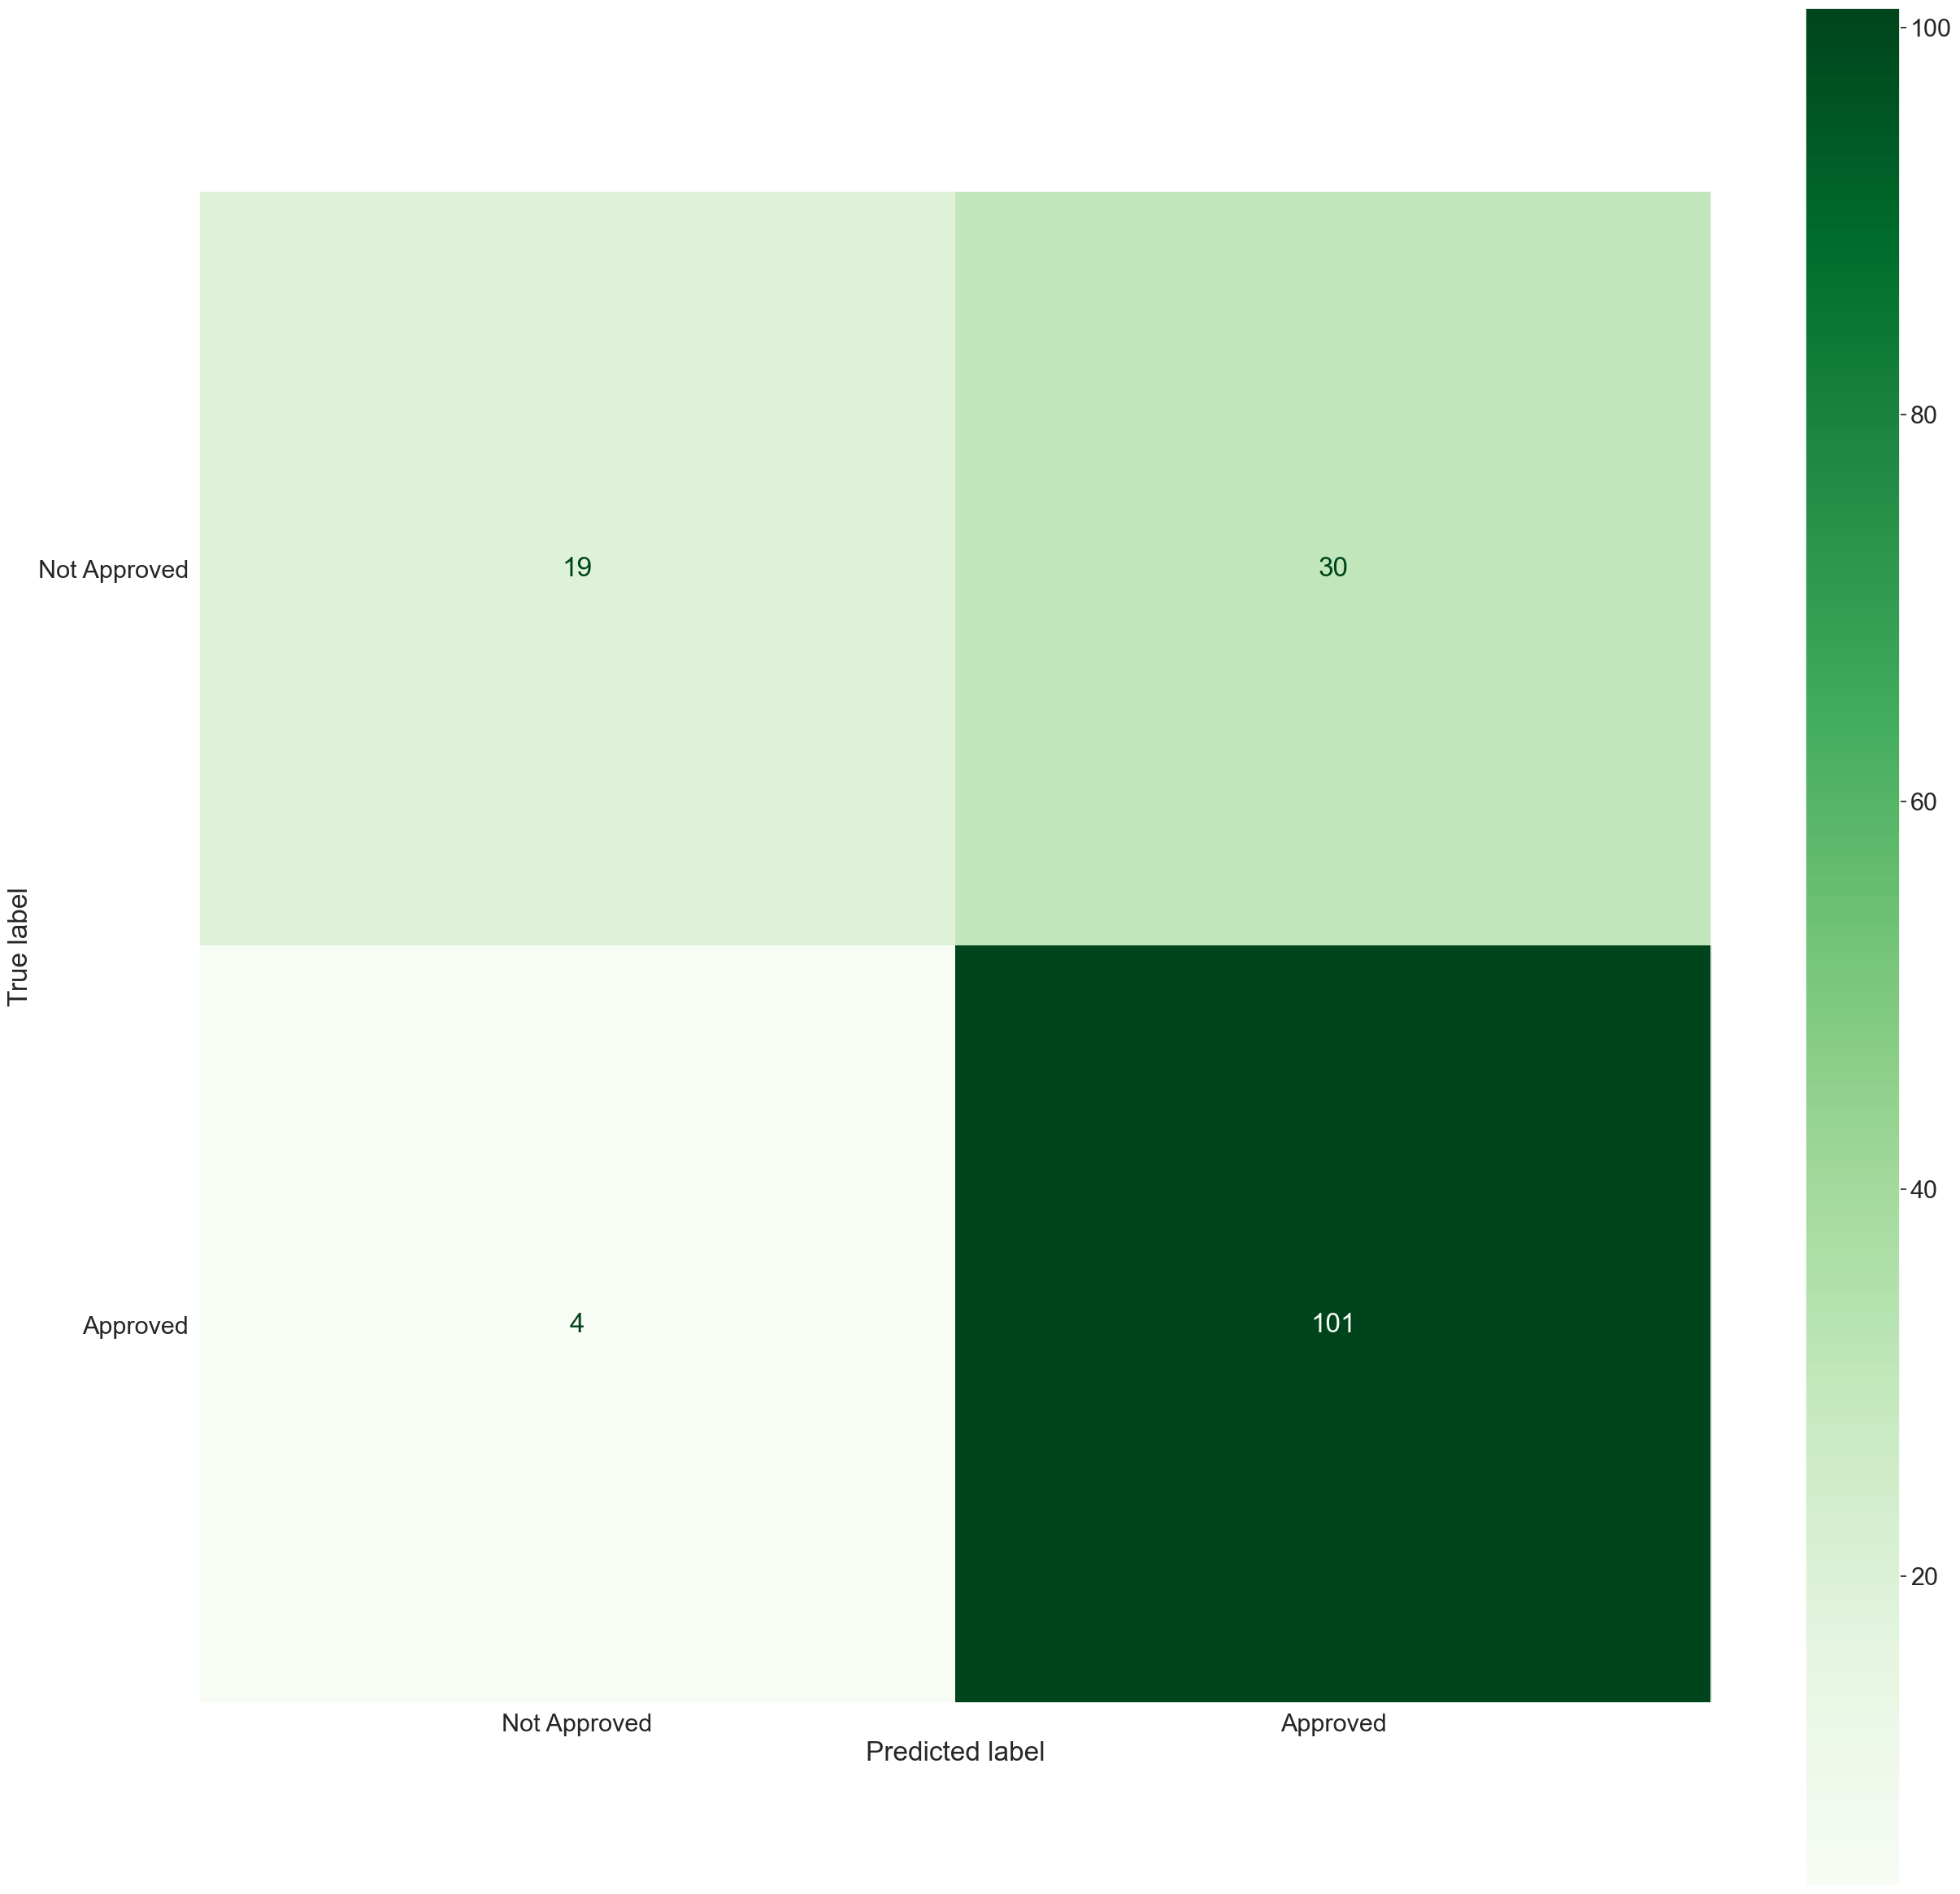

In [81]:
#Visualizing the choices that the model made and the true values on the test set
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_y_pred_gs_pipe, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

#### Summary of best model

It seems like the gridsearched model that included these parameters:

* criterion: gini
* max_depth: 3
* min_samples_split: 10
* n_estimators: 50

had the best performance of all of the models for Random Forest. Out of the 105 approved applications, it was able to correctly identify 101 of them so the rate for correct guesses for the "Approved" category was ~96.1%. However, Out of the 49 not approved applications, it did not perform any better than the Logistic Regression model. The rate for correct guesses for the "Not Approved" category was the as the best Logistic Regression model at 38%.

### Checking feature importances of best model

In [82]:
# Saving importances to a variables
rf_importances = rf_gs.best_estimator_.named_steps['rf'].feature_importances_
rf_importances

array([7.76501551e-02, 3.87361369e-02, 5.25611892e-02, 2.52925814e-03,
       7.35724984e-03, 2.11880741e-02, 2.04540272e-02, 5.54769171e-03,
       1.30812681e-02, 5.19258623e-03, 6.16111374e-03, 7.32514680e-03,
       9.87763297e-03, 6.16266924e-05, 3.10984877e-03, 2.48306704e-02,
       5.52999846e-02, 9.19052232e-03, 2.57713679e-01, 3.20309087e-01,
       0.00000000e+00, 1.58539313e-02, 0.00000000e+00, 9.83746051e-04,
       1.69900389e-03, 8.24453029e-03, 2.68100944e-03, 6.79496564e-03,
       6.06941956e-03, 1.94964450e-02])

In [83]:
#Pulling feature names from the one hot encoded variables
onehot_cols_rf = (
    transformer
    .named_transformers_["categorical"]
    .named_steps["ohe"]
    .get_feature_names_out(X_train_cat.columns)
)
onehot_cols_rf

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0',
       'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0',
       'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0'], dtype=object)

In [84]:
#Combining column names from the numerical and categorical data to make a list
rf_columns = X_train_num.columns.tolist() + onehot_cols_rf.tolist()

In [85]:
#Comgbining the numbers generated from the model and the column names for visualizations
rf_column_importances = list(zip(rf_columns, rf_importances))
rf_column_importances

[('ApplicantIncome', 0.07765015513757464),
 ('CoapplicantIncome', 0.03873613687099134),
 ('LoanAmount', 0.052561189183330456),
 ('Gender_Female', 0.0025292581395953556),
 ('Gender_Male', 0.007357249838930451),
 ('Married_No', 0.021188074106653607),
 ('Married_Yes', 0.020454027232912023),
 ('Dependents_0', 0.005547691714511603),
 ('Dependents_1', 0.01308126808730482),
 ('Dependents_2', 0.00519258623051707),
 ('Dependents_3+', 0.006161113738595923),
 ('Education_Graduate', 0.007325146799610578),
 ('Education_Not Graduate', 0.009877632969829159),
 ('Self_Employed_No', 6.162669236572941e-05),
 ('Self_Employed_Yes', 0.0031098487701153024),
 ('Property_Area_Rural', 0.024830670350562068),
 ('Property_Area_Semiurban', 0.055299984643457624),
 ('Property_Area_Urban', 0.009190522315734227),
 ('Credit_History_0.0', 0.2577136791966882),
 ('Credit_History_1.0', 0.3203090868322026),
 ('Loan_Amount_Term_12.0', 0.0),
 ('Loan_Amount_Term_36.0', 0.015853931324199294),
 ('Loan_Amount_Term_60.0', 0.0),
 ('

In [86]:
#Creating a dataframe to make the data easier for visualization
rf_ci_df = pd.DataFrame({"Columns": rf_columns,
                   "Importances": rf_importances})
rf_ci_df

,Columns,Importances
0,ApplicantIncome,0.077650
1,CoapplicantIncome,0.038736
2,LoanAmount,0.052561
3,Gender_Female,0.002529
4,Gender_Male,0.007357
5,Married_No,0.021188
6,Married_Yes,0.020454
7,Dependents_0,0.005548
8,Dependents_1,0.013081
9,Dependents_2,0.005193


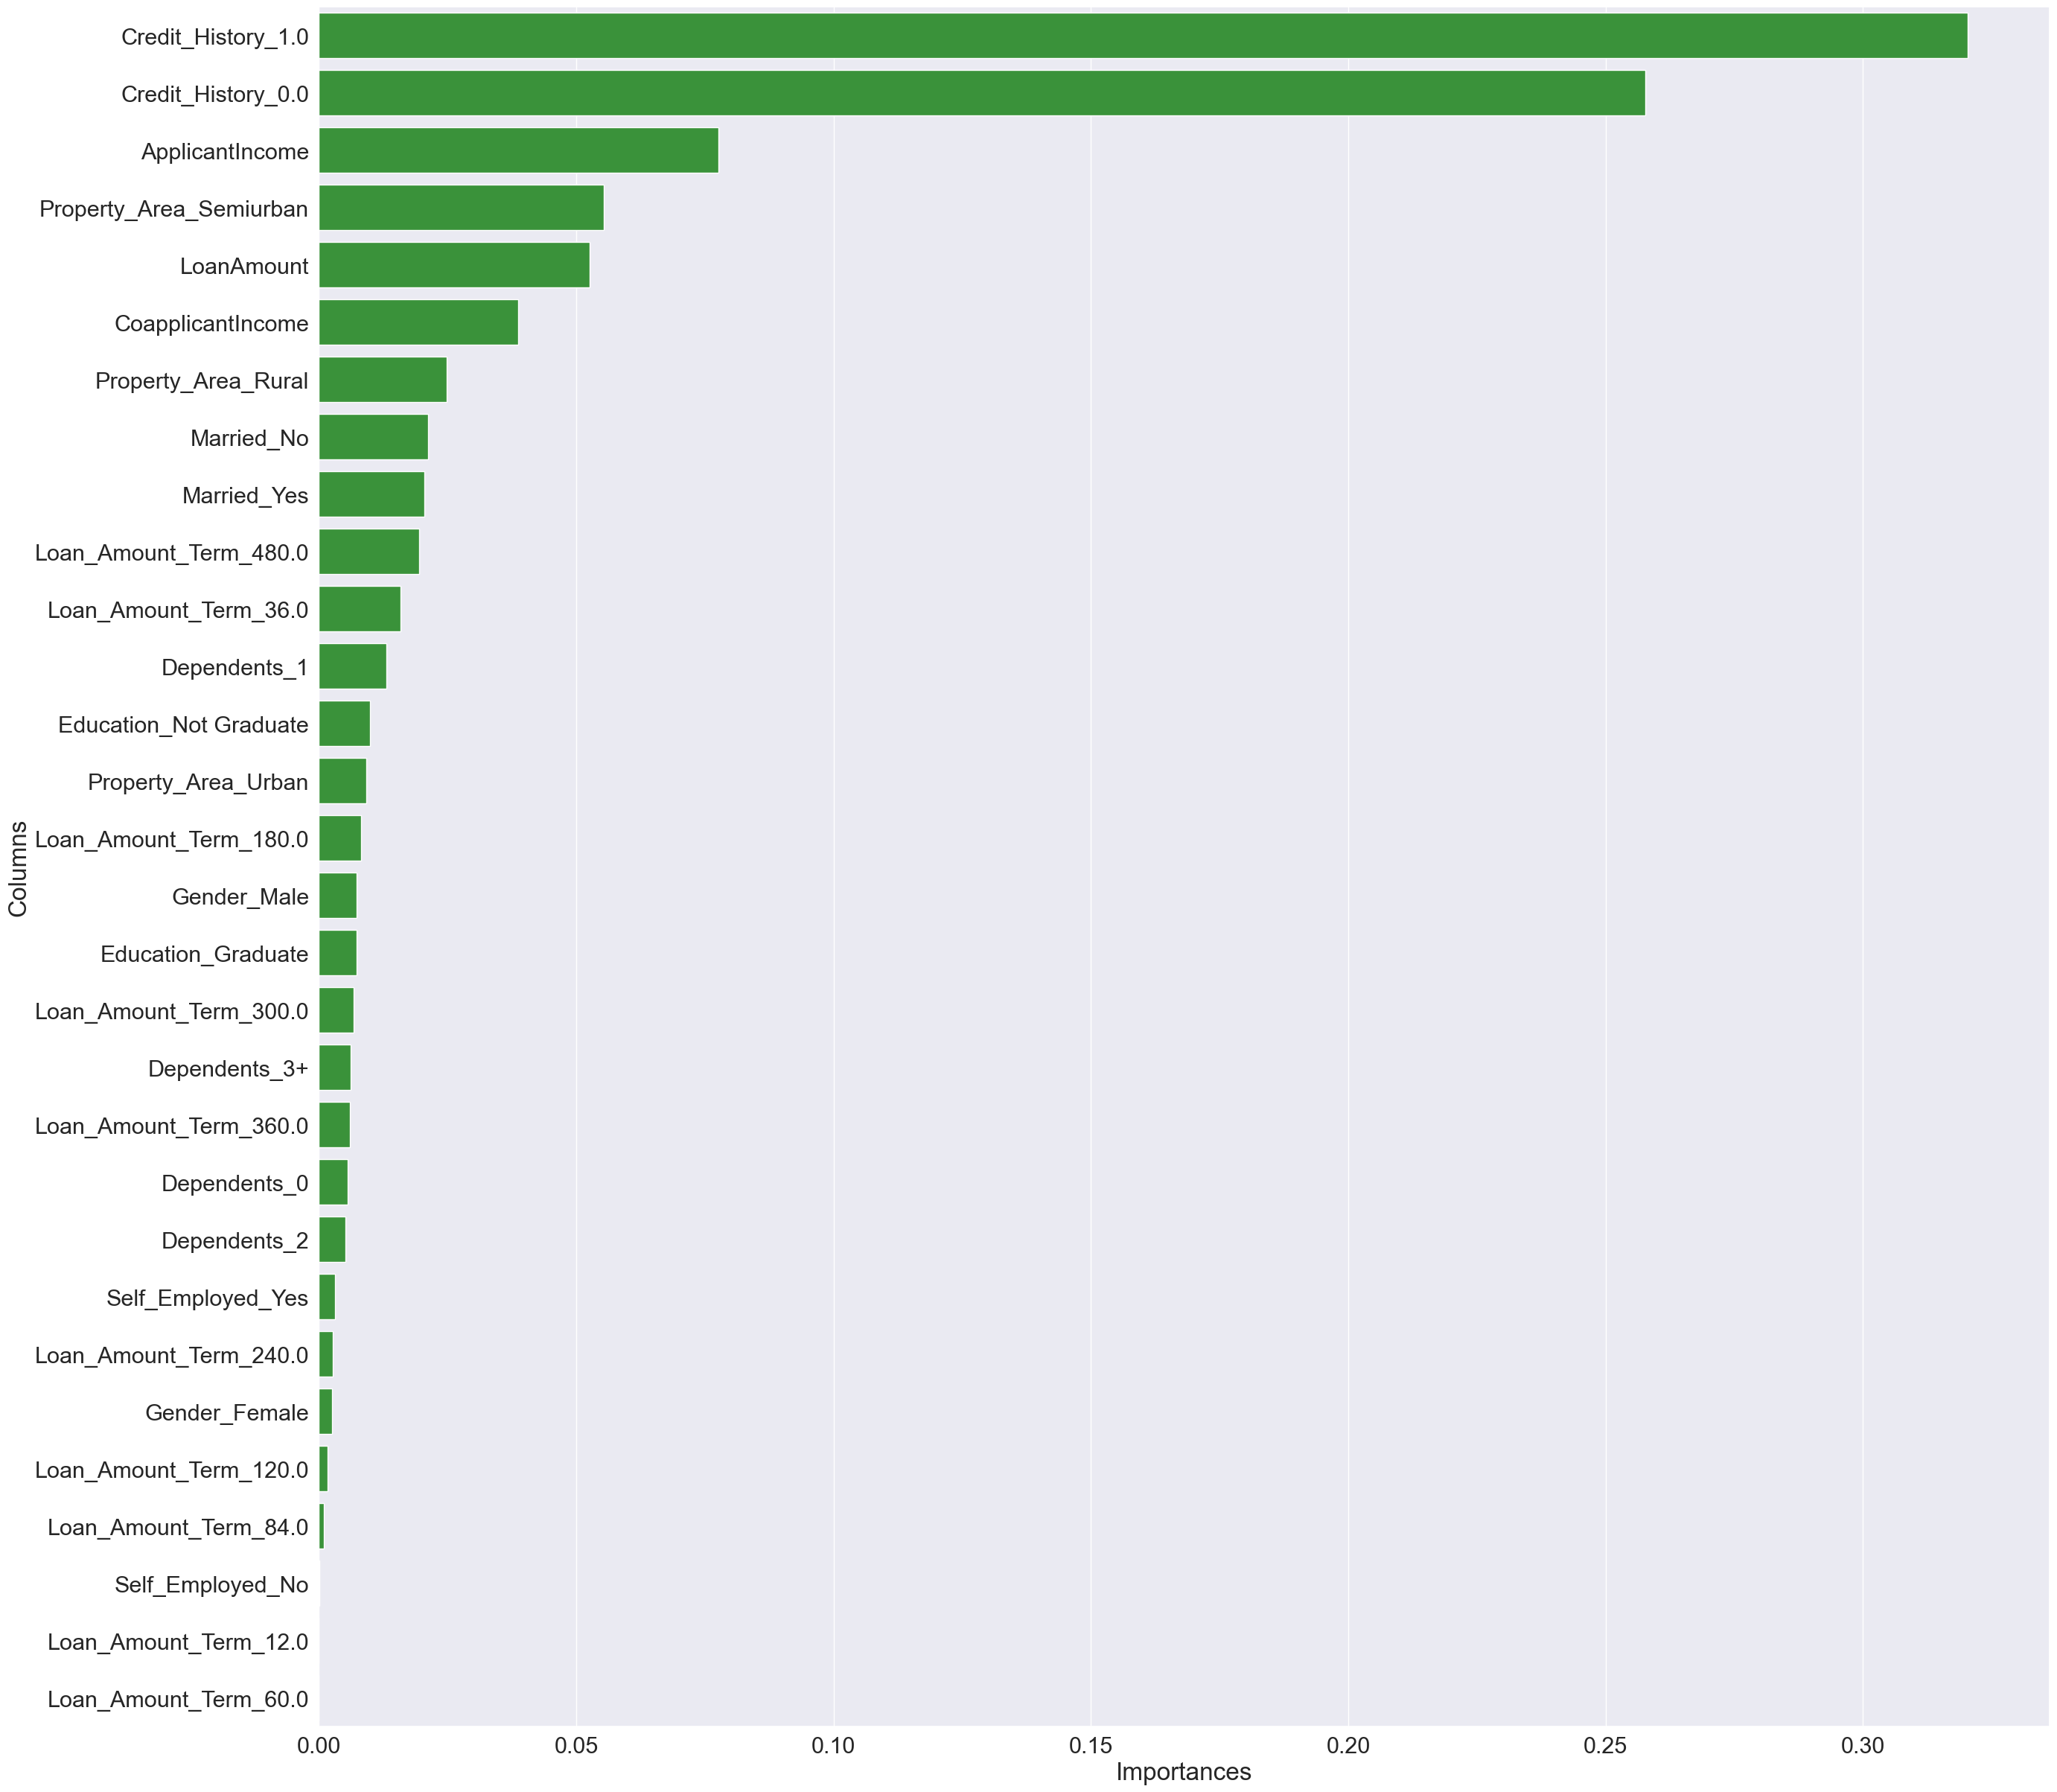

In [87]:
#Checking which features were more important to the model
sns.barplot(x = rf_ci_df['Importances'], 
            y = rf_ci_df['Columns'], 
            data = rf_ci_df,
            color = 'tab:green',
            order = rf_ci_df.sort_values('Importances', ascending=False).Columns,
            orient = 'h')
sns.set(rc={'figure.figsize':(30,30)},font_scale= 2)
plt.show()

#### Summary of feature importances

According to the feature importance extracted from the best Random Forest model, the most important features in the dataset are the same as the one listed for Logistic Regression. Credit History plays a very important role in the models. Where the Random Forest model differs however is that after Credit History, the Loan Amount seems to be the next most important feature compared to the Logistic Regression model where Coapplicant Income or Living in a Semiurban Area was the next most important feature.

## XGBoost

### Baseline XGBoost model using Pipeline

In [88]:
#Using counter to count values in target
counter = Counter(y)

# Calculating values for class weights to be put into XGB model
estimate = counter[0] / counter[1]
print('Estimate: %.2f' % estimate)

Estimate: 0.45


In [89]:
#Setting up pipeline for model that includes previous processing pipeline and adding weights to deal with data imbalance
baseline_xgb_pipe = Pipeline(steps=[
    ('transformer', transformer),
    ('xgboost', XGBClassifier(scale_pos_weight = estimate, random_state=1))])

#Fitting training data into the pipeline
baseline_xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=1, ...))])

#### Checking on the Train set

In [90]:
#Generating predictions based on the train data for further evaluation
xgb_y_pred = baseline_xgb_pipe.predict(X_train)

In [91]:
scores = cross_val_score(baseline_xgb_pipe, X_train, y_train, cv=5 )
scores.mean()

0.767391304347826

In [92]:
#Checking our metrics to see how well our model performed
print(classification_report(y_train, xgb_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       317

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



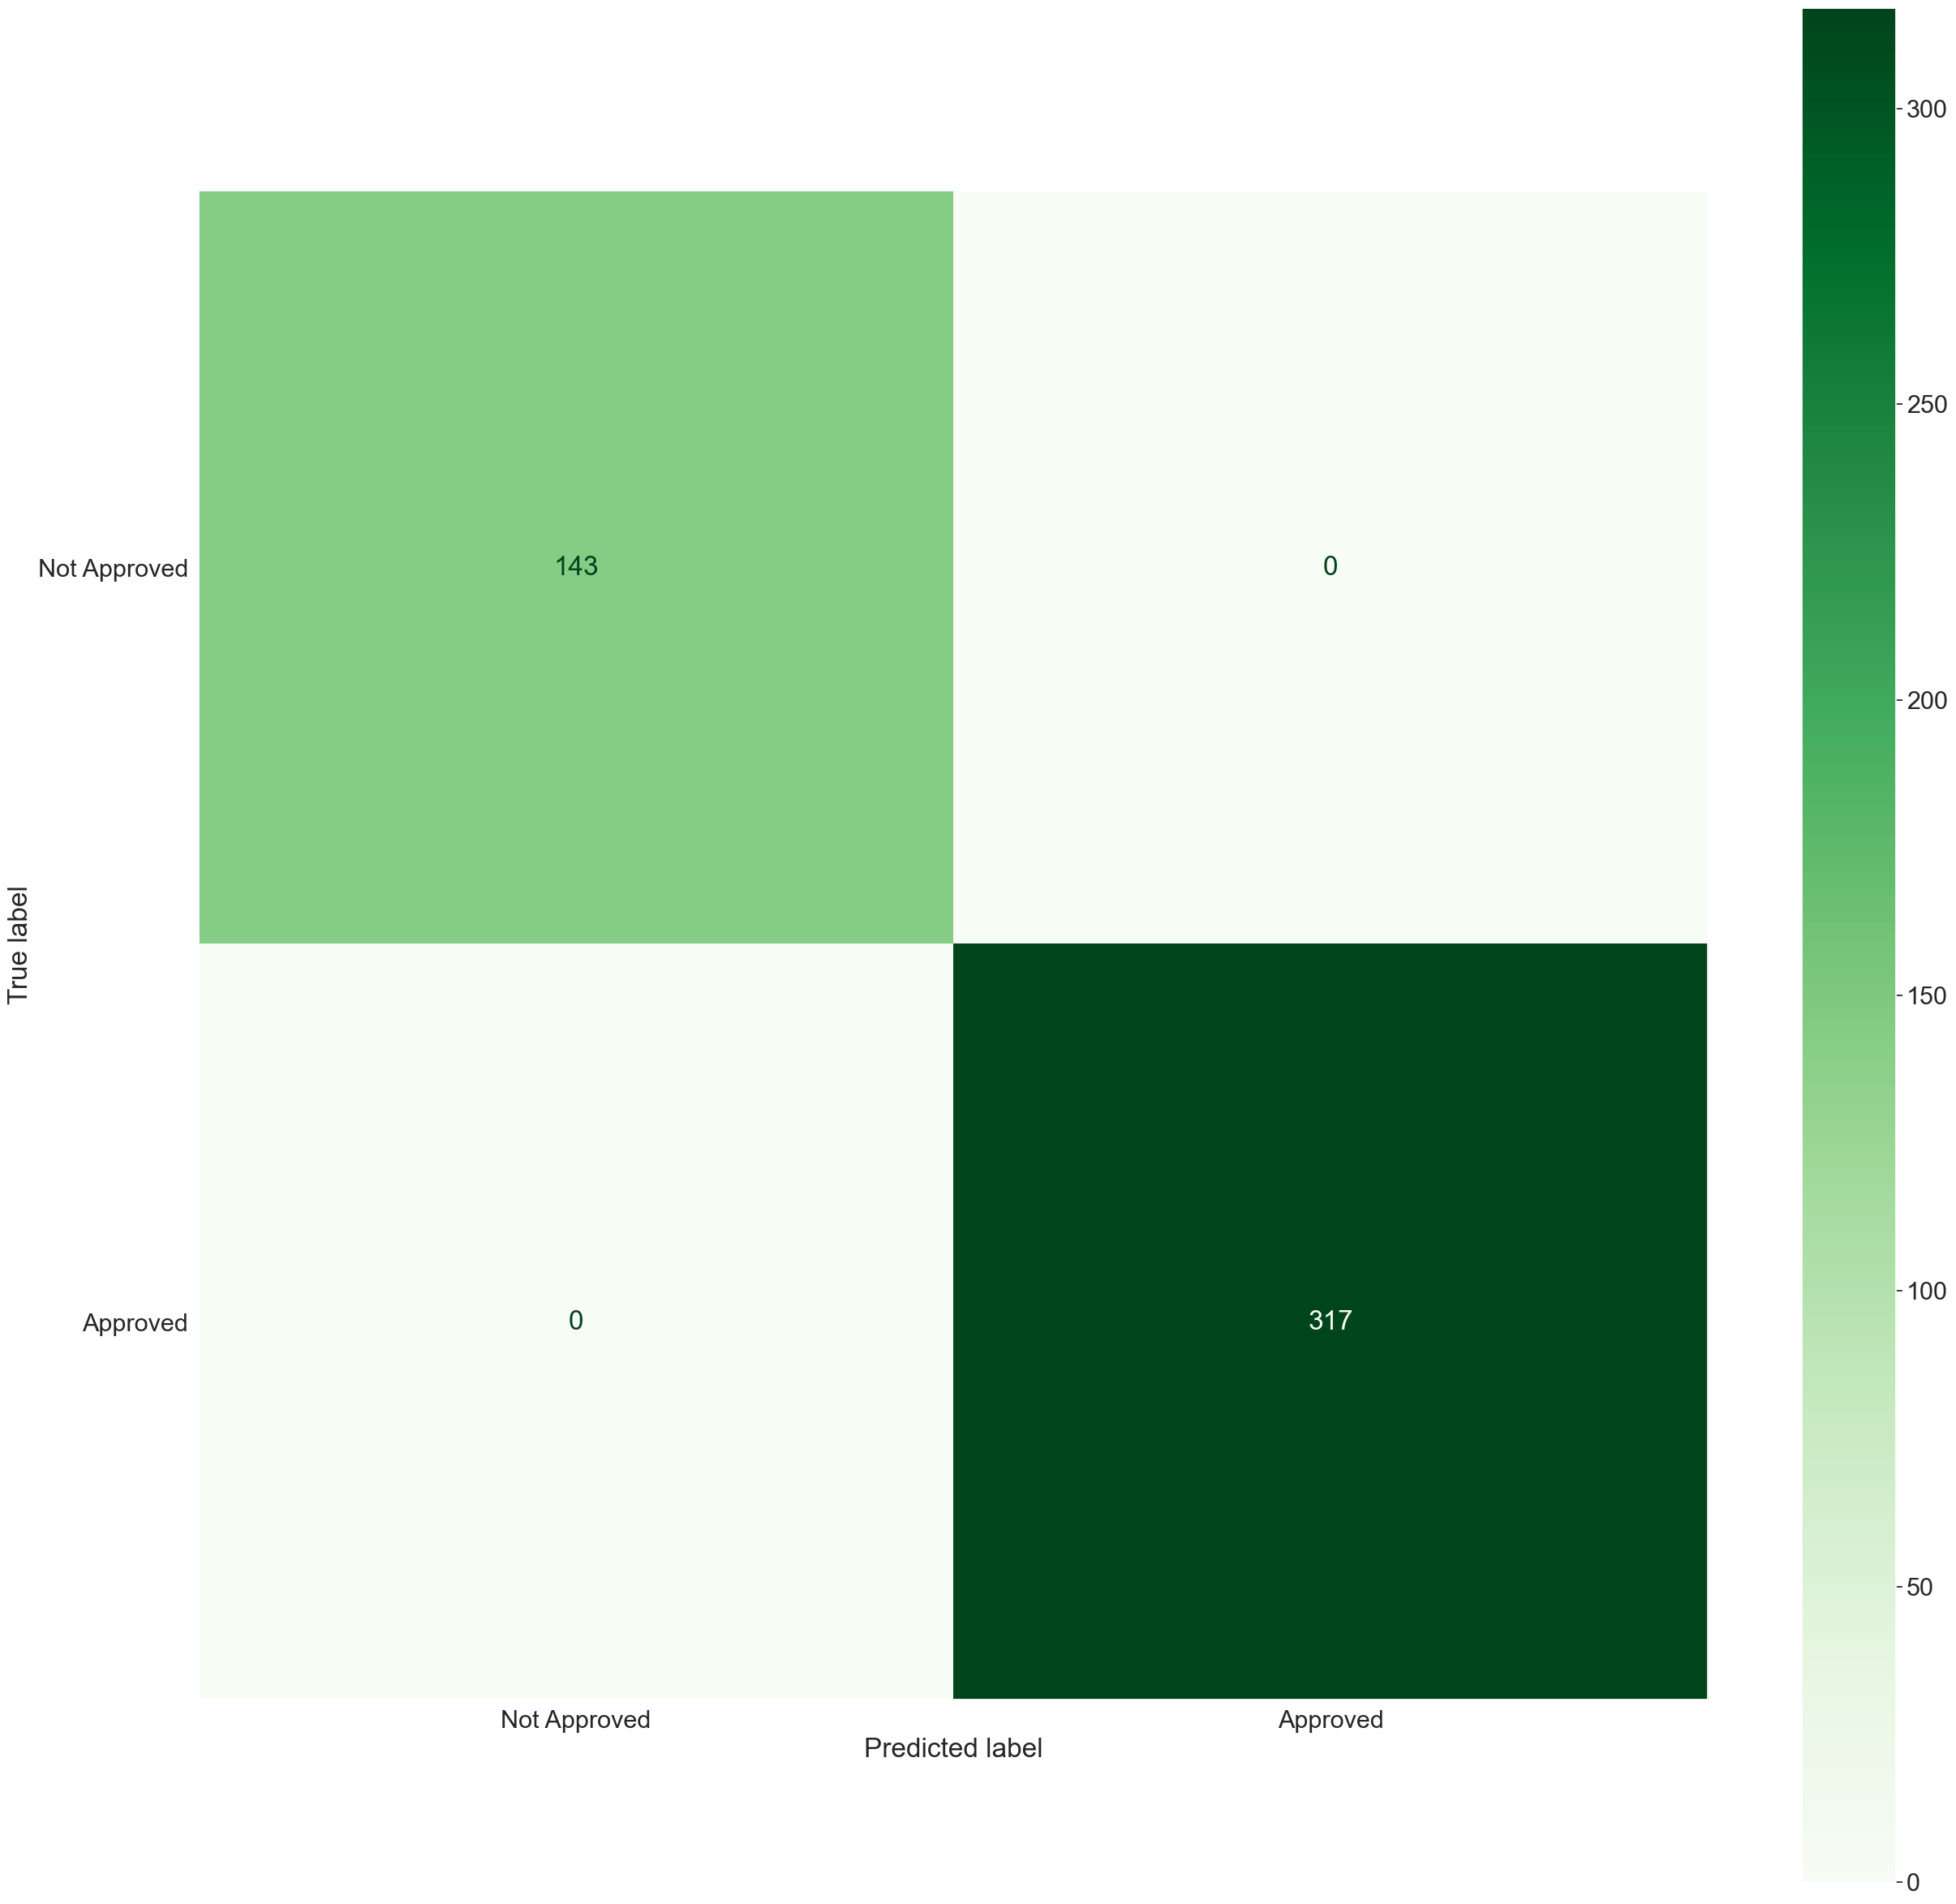

In [93]:
#Visualizing the choices that the model made and the true values
ConfusionMatrixDisplay.from_predictions(y_train, xgb_y_pred, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

### XGBoost Using Gridsearch (with Pipeline)

In [94]:
#Setting up pipeline for model that includes previous processing pipeline and adding weights to deal with data imbalance
xgb_gs_pipe = Pipeline(steps=[
    ('transformer', transformer),
    ('xgb', XGBClassifier(scale_pos_weight = estimate, random_state=2))])

In [95]:
#Setting of parameters for gridsearch to use
xgb_grid = {
    'xgb__learning_rate': [0.1, 0.3, 0.7],
    'xgb__max_depth': [6, 20, 50],
    'xgb__min_child_weight': [1, 5, 10],
    'xgb__subsample': [0.3, 0.5, 0.7, 1],
    'xgb__alpha': [0, .01, .001, .0001],
    'xgb__n_estimators': [50, 100, 200]
}

In [96]:
#Applying pipeline and grid for the Gridsearch
xgb_gs = GridSearchCV(estimator = xgb_gs_pipe, param_grid = xgb_grid, cv = 5)

In [97]:
#Fitting train data to the model
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=2, ...))]),
             param_grid={'xgb__alpha': [0, 0.01, 0.001, 0.0001],
                         'xgb__learning_rate': [0.1, 0.3, 0.7],
                         'xgb__max_depth': [6, 20, 50],
                         'xgb__min_child_weight': [1, 5, 10],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__subsample': [0.3, 0.5, 0.7, 1]})

#### Checking on the Train set

In [98]:
# Checking the best parameters chosen by the grid search
xgb_gs.best_params_

{'xgb__alpha': 0,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 20,
 'xgb__min_child_weight': 1,
 'xgb__n_estimators': 50,
 'xgb__subsample': 0.5}

In [99]:
# Checking the best score chosen by the grid search
xgb_gs.best_score_

0.7956521739130435

In [100]:
# Checking the best estimated score chosen by the grid search
xgb_gs.best_estimator_.score(X_train, y_train)

0.9195652173913044

In [101]:
# Saving our predictions to a variable
xgb_gs_y_pred = xgb_gs.predict(X_train)

In [102]:
#Checking our metrics to see how well our model performed
print(classification_report(y_train, xgb_gs_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       143
           1       0.93      0.95      0.94       317

    accuracy                           0.92       460
   macro avg       0.91      0.90      0.91       460
weighted avg       0.92      0.92      0.92       460



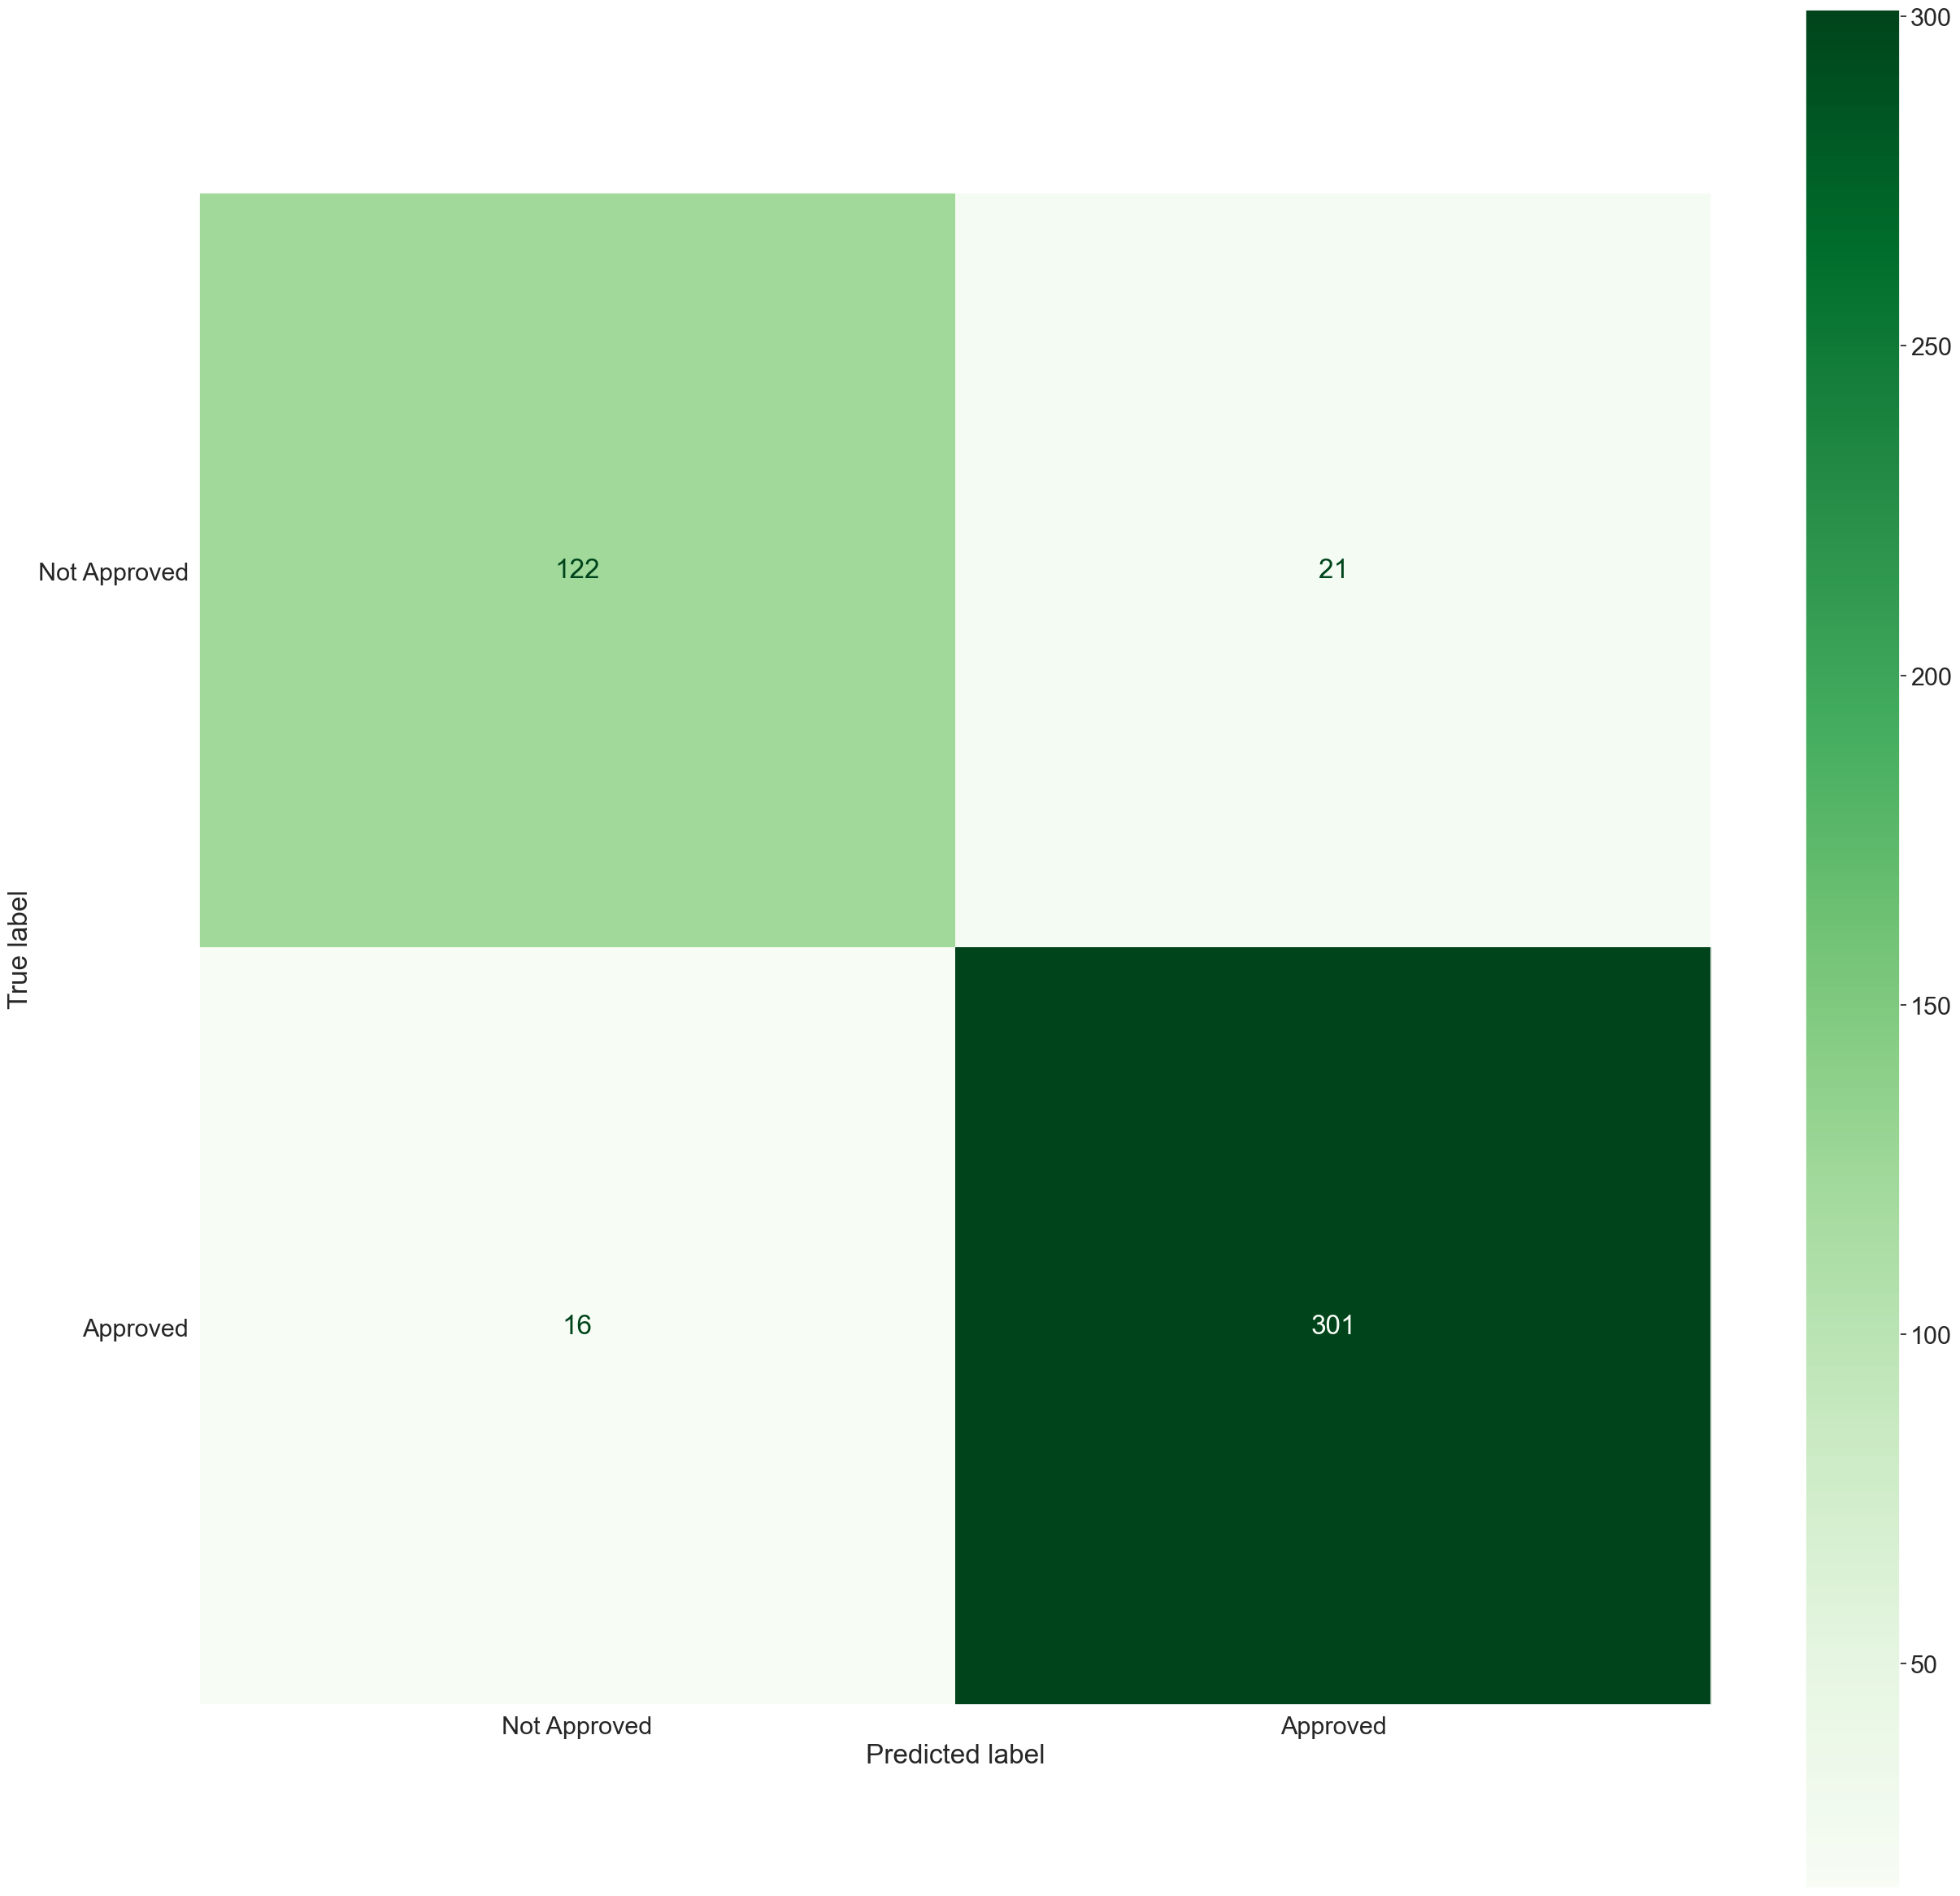

In [103]:
#Visualizing the choices that the model made and the true values
ConfusionMatrixDisplay.from_predictions(y_train, xgb_gs_y_pred, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

### Using Best model on Test set (XGBoost Using Gridsearch)

In [104]:
# Saving our test predictions to a variable
xgb_test_y_pred_gs_pipe = xgb_gs.predict(X_test)

In [105]:
#Checking our metrics to see how well our model performed
print(classification_report(y_test, xgb_test_y_pred_gs_pipe))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        49
           1       0.81      0.87      0.84       105

    accuracy                           0.77       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154



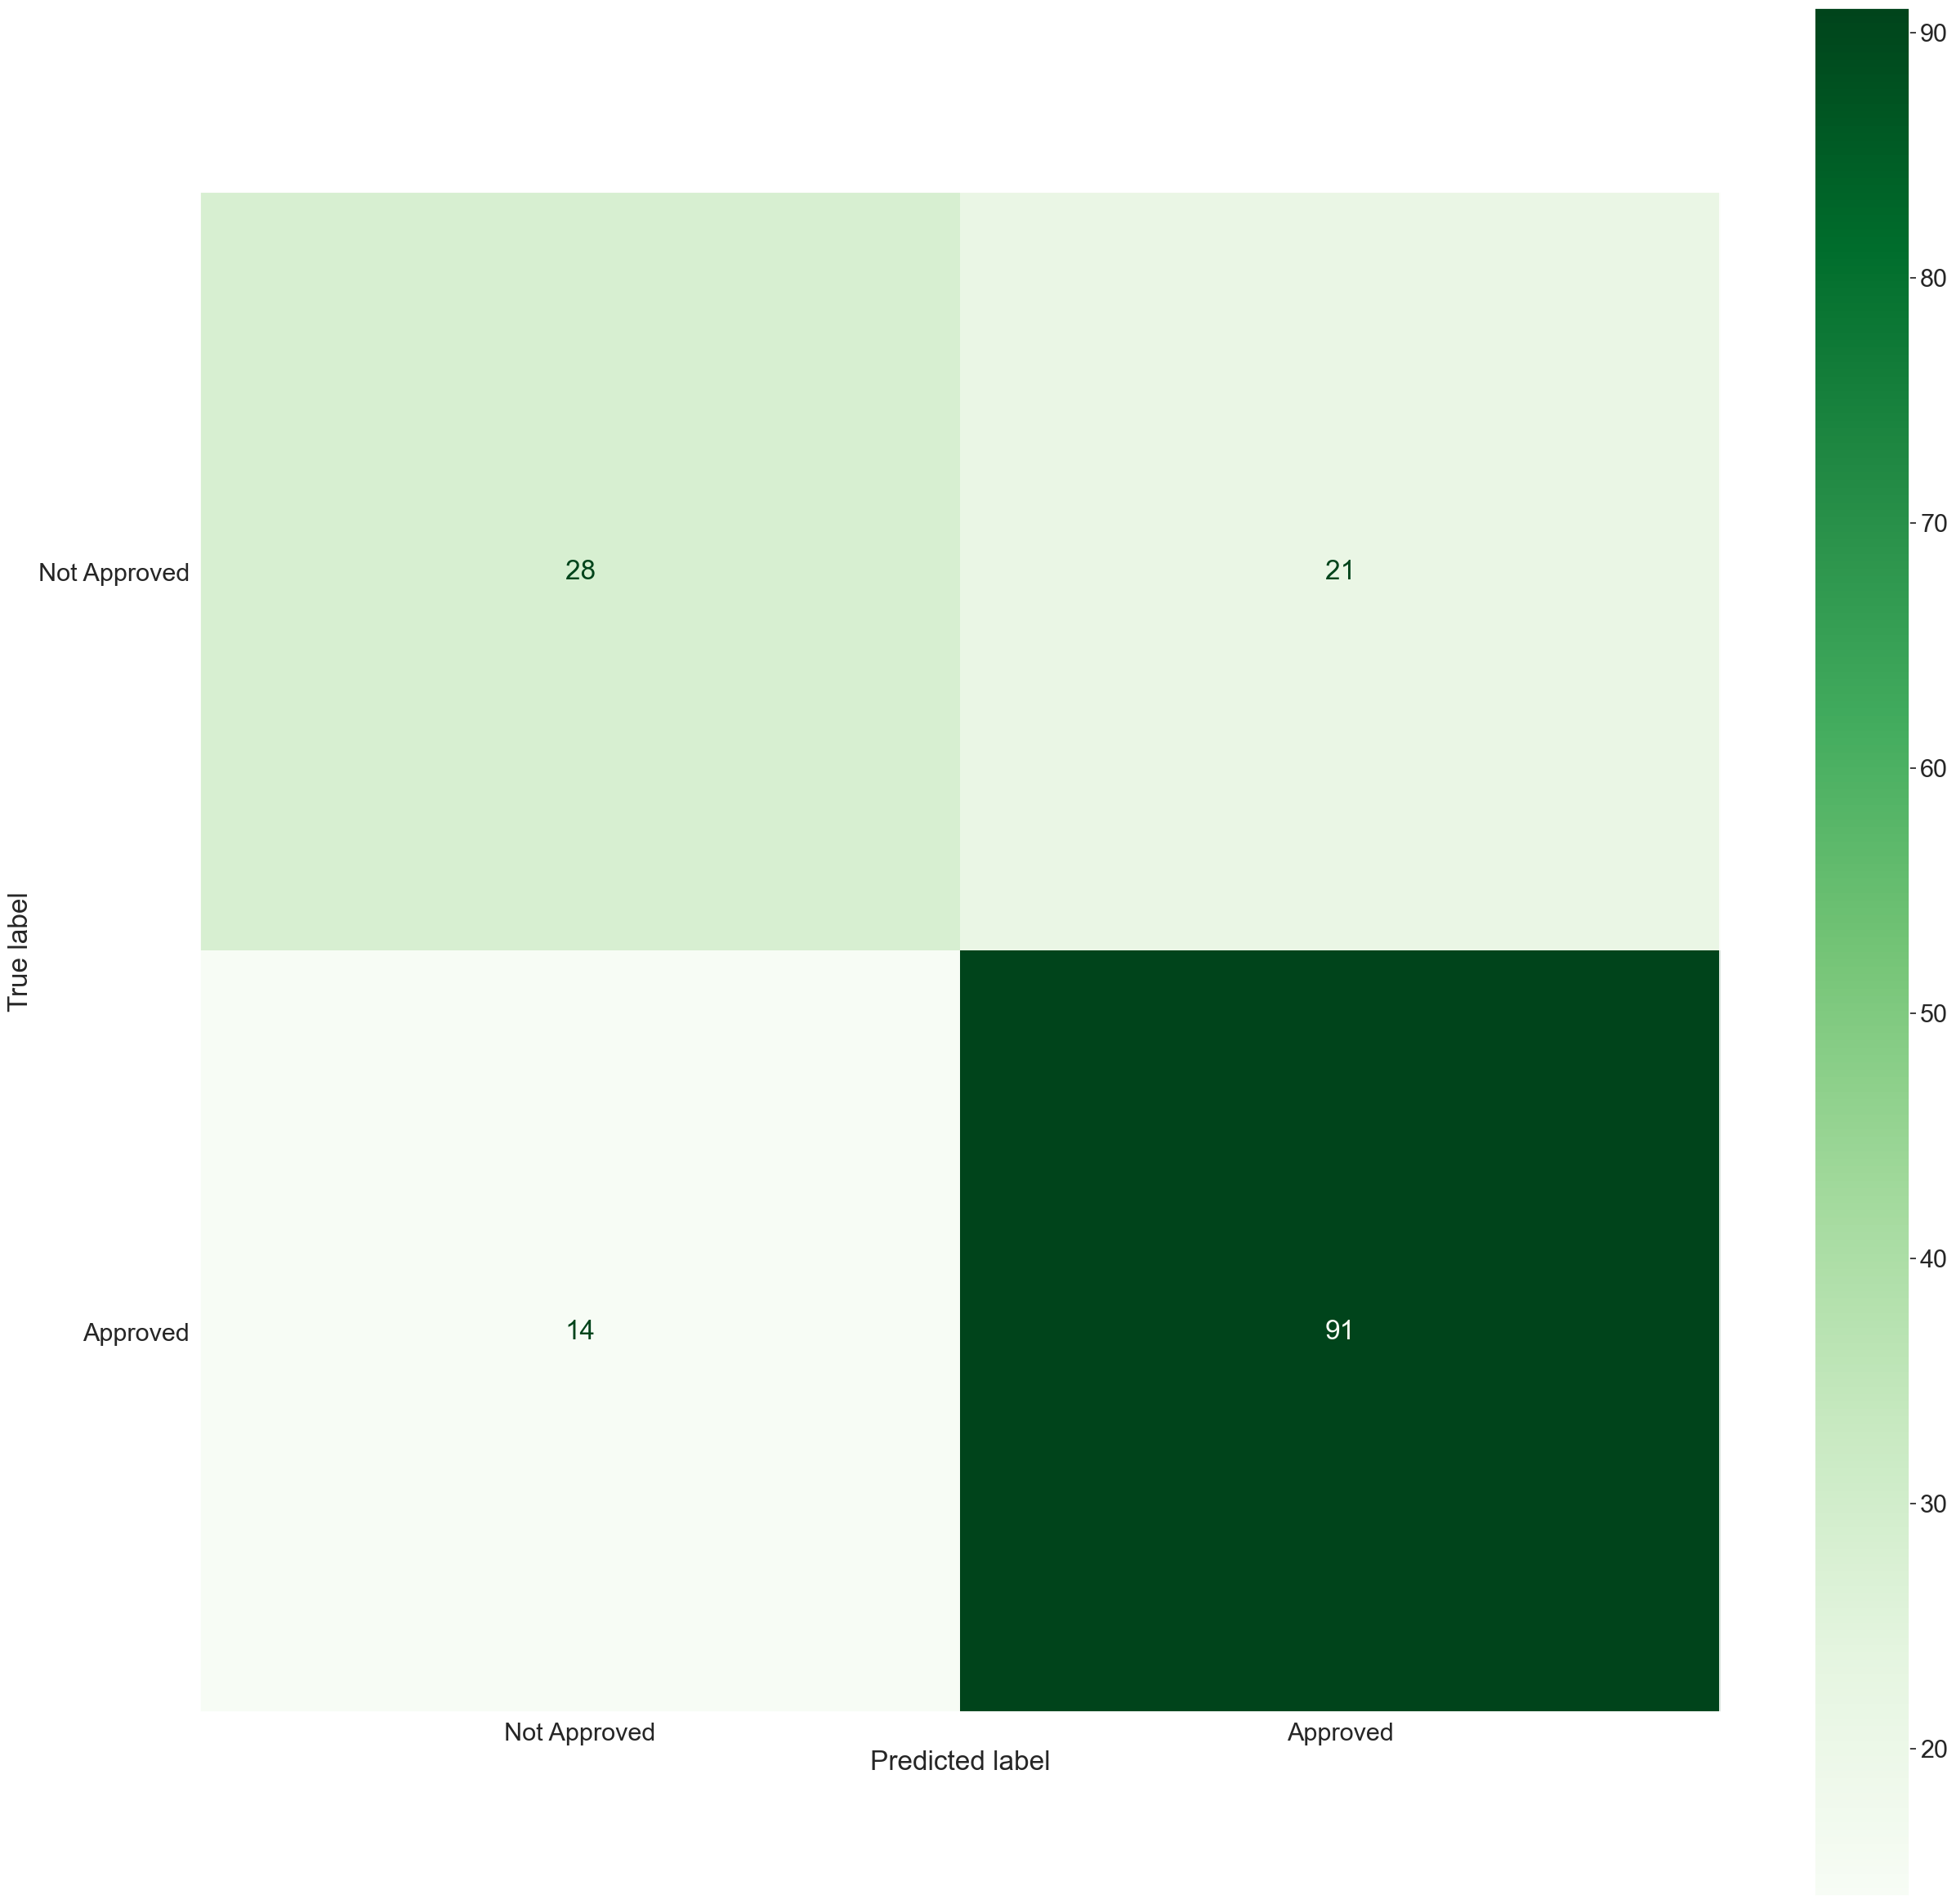

In [106]:
#Visualizing the choices that the model made and the true values on the test set
ConfusionMatrixDisplay.from_predictions(y_test, xgb_test_y_pred_gs_pipe, display_labels = ['Not Approved', 'Approved'], cmap='Greens')
plt.grid(False);

#### Summary of best model

It seems like the gridsearched model that included these parameters:

* alpha: 0
* learning_rate: 0.1
* min_child_weight: 1
* n_estimators: 50
* subsample: 0.5

had the best performance of all of the models for XGBoost. Out of the 105 approved applications, it was able to correctly identify 91 of them so the rate for correct guesses for the "Approved" category was ~86.6%. However, Out of the 49 not approved applications, it was the best performing out of all of the models with 28 correct. The rate for correct guesses for the "Not Approved" category" was ~57.1%.

### Checking feature importances of best model

In [107]:
xgb_importances =xgb_gs.best_estimator_.named_steps['xgb'].feature_importances_
xgb_importances

array([0.04117095, 0.04018237, 0.03706865, 0.02397467, 0.        ,
       0.06046415, 0.        , 0.03786454, 0.03712113, 0.02192691,
       0.02983563, 0.04527353, 0.        , 0.05786018, 0.        ,
       0.0393727 , 0.06079552, 0.034545  , 0.2687622 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05124247, 0.        , 0.        , 0.04858521, 0.06395417],
      dtype=float32)

In [108]:
onehot_cols_xgb = (
    transformer
    .named_transformers_["categorical"]
    .named_steps["ohe"]
    .get_feature_names_out(X_train_cat.columns)
)
onehot_cols_xgb

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0',
       'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0',
       'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
       'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0'], dtype=object)

In [109]:
#Combining column names from the numerical and categorical data to make a list
xgb_columns = X_train_num.columns.tolist() + onehot_cols_xgb.tolist()

In [110]:
#Comgbining the numbers generated from the model and the column names for visualizations
column_importances = list(zip(xgb_columns, xgb_importances))
column_importances

[('ApplicantIncome', 0.04117095),
 ('CoapplicantIncome', 0.04018237),
 ('LoanAmount', 0.037068654),
 ('Gender_Female', 0.023974668),
 ('Gender_Male', 0.0),
 ('Married_No', 0.06046415),
 ('Married_Yes', 0.0),
 ('Dependents_0', 0.03786454),
 ('Dependents_1', 0.037121132),
 ('Dependents_2', 0.021926908),
 ('Dependents_3+', 0.029835626),
 ('Education_Graduate', 0.045273535),
 ('Education_Not Graduate', 0.0),
 ('Self_Employed_No', 0.057860184),
 ('Self_Employed_Yes', 0.0),
 ('Property_Area_Rural', 0.039372697),
 ('Property_Area_Semiurban', 0.06079552),
 ('Property_Area_Urban', 0.034545),
 ('Credit_History_0.0', 0.2687622),
 ('Credit_History_1.0', 0.0),
 ('Loan_Amount_Term_12.0', 0.0),
 ('Loan_Amount_Term_36.0', 0.0),
 ('Loan_Amount_Term_60.0', 0.0),
 ('Loan_Amount_Term_84.0', 0.0),
 ('Loan_Amount_Term_120.0', 0.0),
 ('Loan_Amount_Term_180.0', 0.051242467),
 ('Loan_Amount_Term_240.0', 0.0),
 ('Loan_Amount_Term_300.0', 0.0),
 ('Loan_Amount_Term_360.0', 0.048585206),
 ('Loan_Amount_Term_480.0'

In [111]:
#Creating a dataframe to make the data easier for visualization
xgb_ci_df = pd.DataFrame({"Columns": xgb_columns,
                   "Importances": xgb_importances})
xgb_ci_df

,Columns,Importances
0,ApplicantIncome,0.041171
1,CoapplicantIncome,0.040182
2,LoanAmount,0.037069
3,Gender_Female,0.023975
4,Gender_Male,0.000000
5,Married_No,0.060464
6,Married_Yes,0.000000
7,Dependents_0,0.037865
8,Dependents_1,0.037121
9,Dependents_2,0.021927


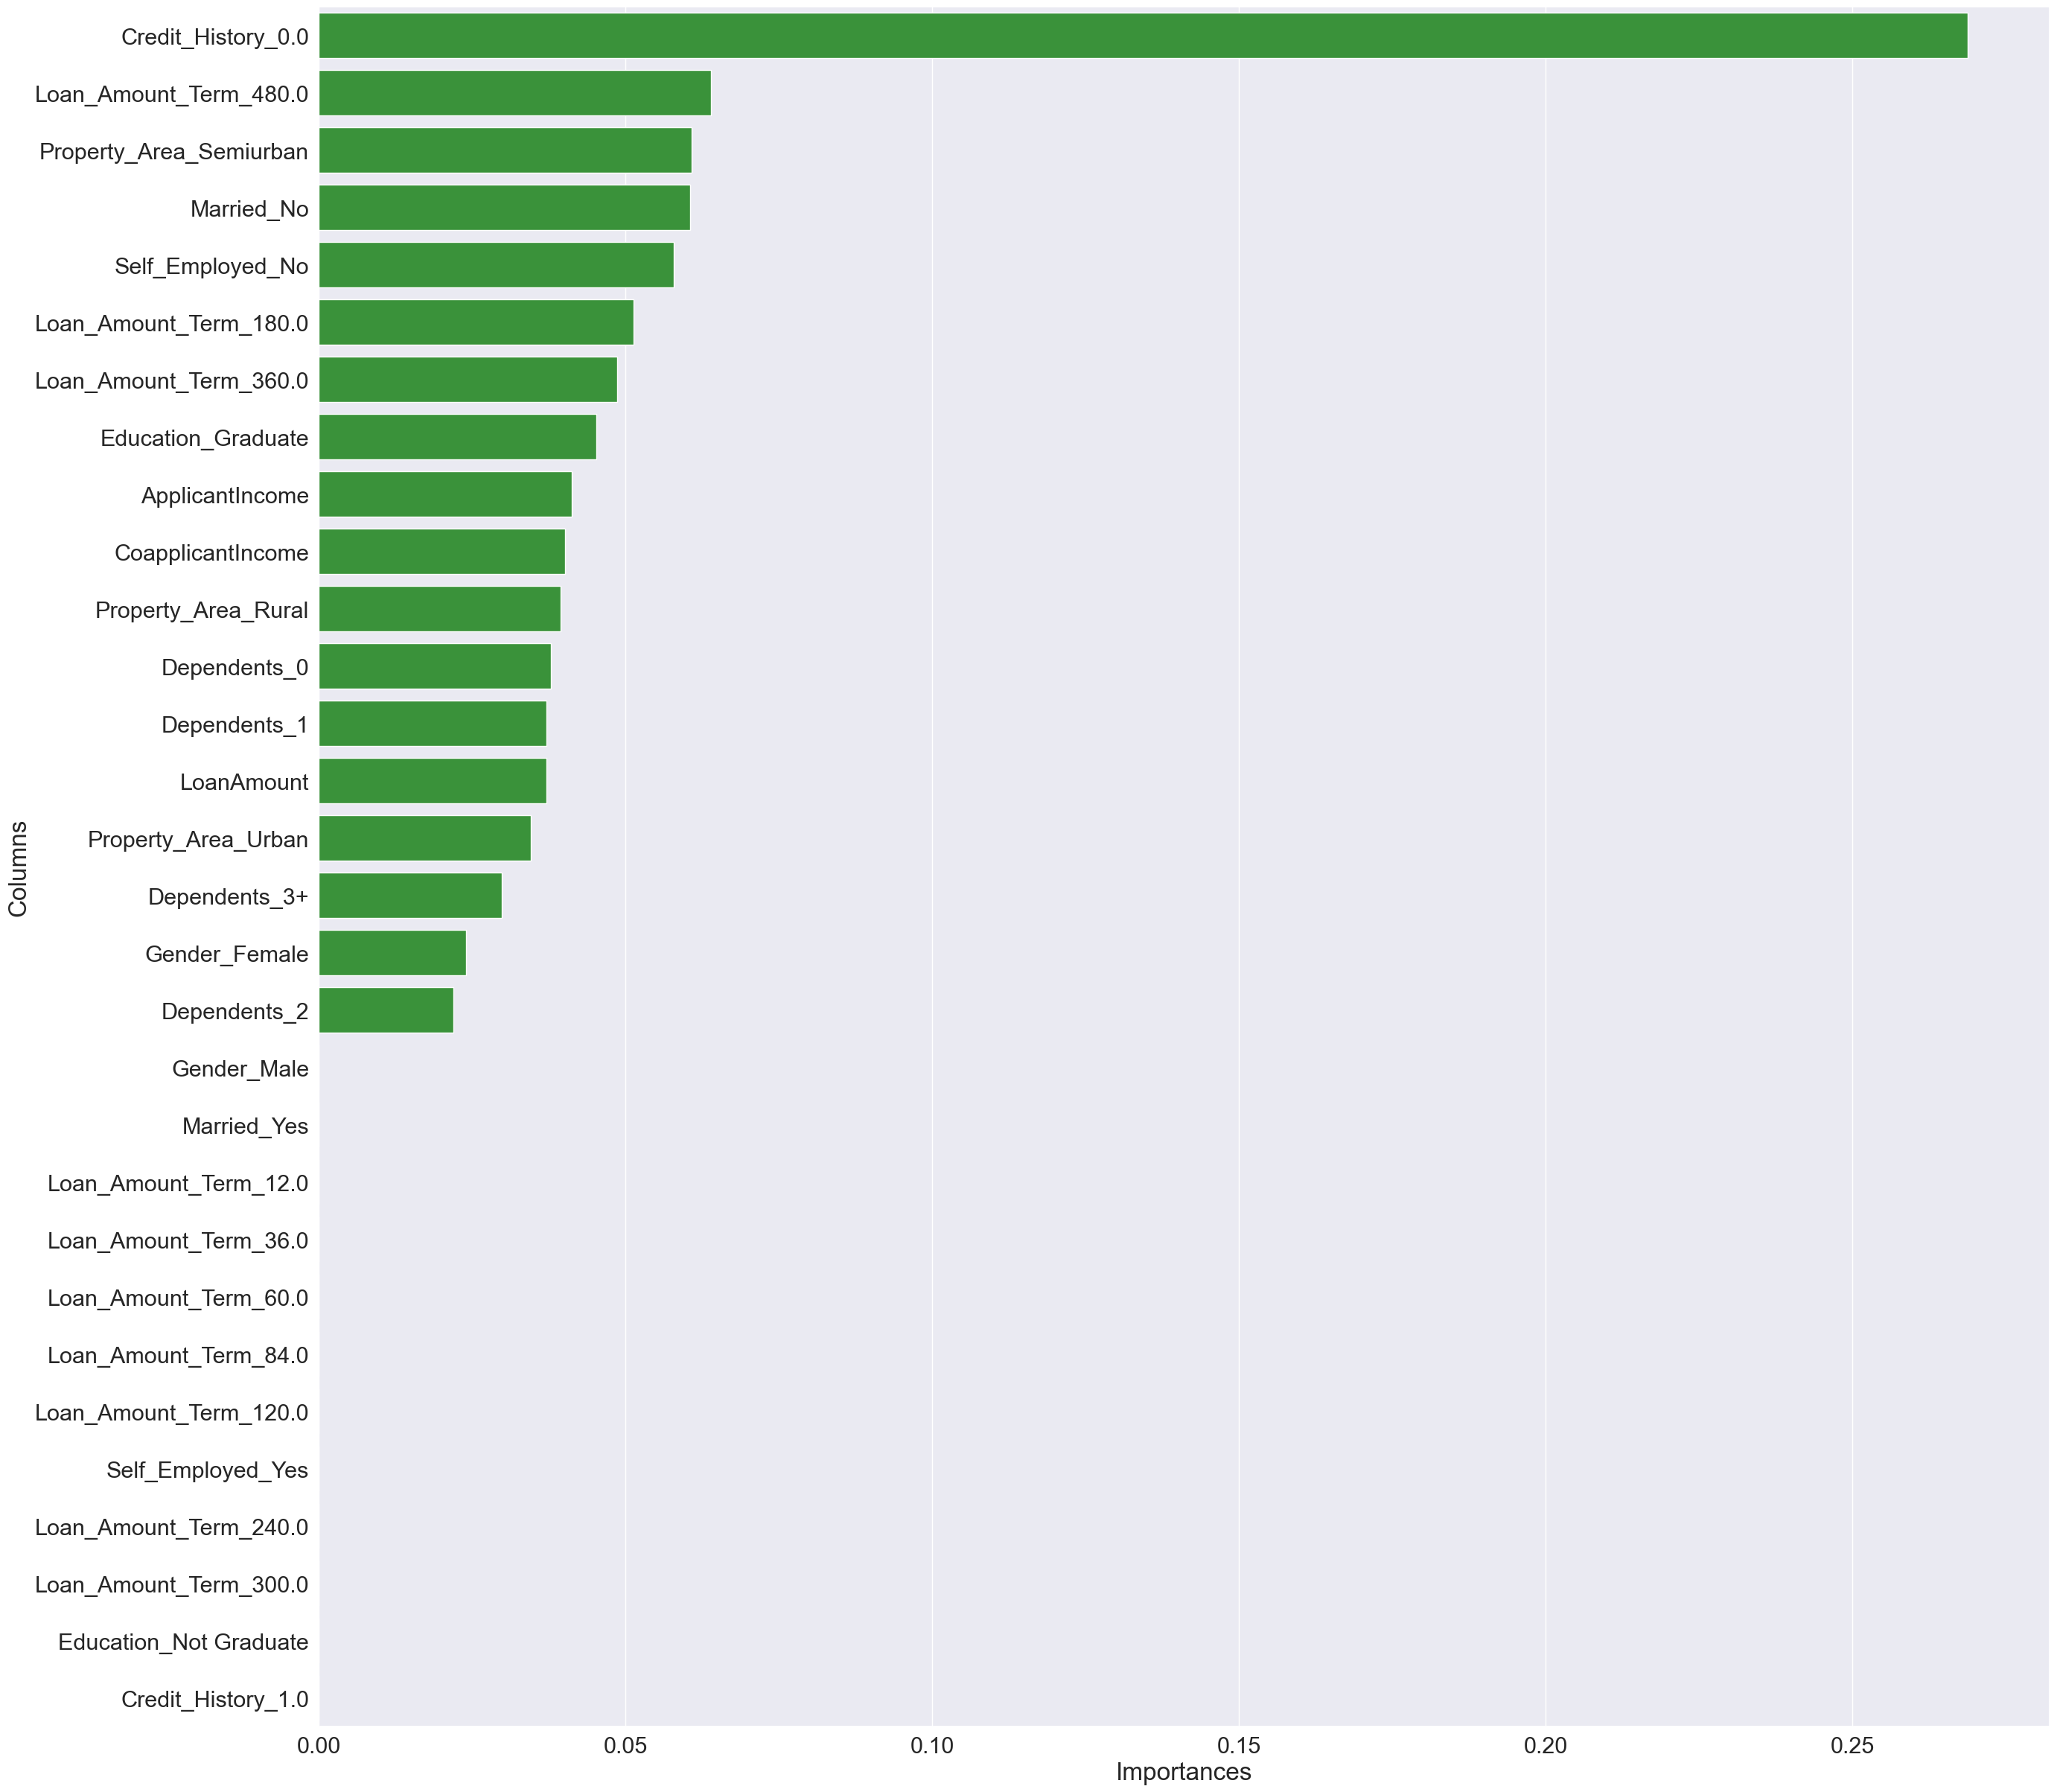

In [112]:
#Checking which features were more important to the model
sns.barplot(x = xgb_ci_df['Importances'], 
            y = xgb_ci_df['Columns'], 
            data = xgb_ci_df,
            color = 'tab:green',
            order = xgb_ci_df.sort_values('Importances', ascending=False).Columns,
            orient = 'h')
sns.set(rc={'figure.figsize':(30,30)},font_scale= 2)
plt.show()

#### Summary of feature importances

According to the feature importance extracted from the best XGBoost model, the most important feature in the dataset still goes to Credit History. However, in this case, the most important was when someone does not have Credit History. The next most important feature was whether someone applied for a 480 month loan. It was interesting to see that whether someone had Credit History did not have important according to this model.

# Conclusion

The final model chosen was the gridsearched XGBoost model. It did not perform better than the Random Forest or even the Logistic Regression model in terms of the approved category. RF and LR outperformed the XGB model by ~10% in terms of approved applications. The XGB model did however, outperform both models in terms of the not approved category. In terms of business, it is much more of a risk to give out loans to people who are not supposed to be approved. The XGBoost model was the only model that had more than a 50% success rate at filtering the not approved applications. 


# Exporting Final Model

In [113]:
# Assigning a file name to the model
filename = 'finalized_loan_model.pkl'

In [114]:
# Exporting model out as a pkl file
pickle.dump(xgb_gs, open(filename, 'wb'))